In [ ]:
# Importar librerías necesarias
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")  
plt.rcParams['figure.figsize'] = (12, 8)

print("Librerías importadas correctamente")


Librerías importadas correctamente


In [75]:
column_names = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num',
    'marital_status', 'occupation', 'relationship', 'race', 'sex',
    'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income'
]

df = pd.read_csv('../../../datos/adult.data', names=column_names, na_values=' ?')

print(f"Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Columna fnlwgt presente: {'fnlwgt' in df.columns}")
print("\nPrimeras 5 filas:")
df.head()


Dataset cargado: 32561 filas, 15 columnas
Columna fnlwgt presente: True

Primeras 5 filas:


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [76]:
print("Información del dataset:")
print(df.info())
print("\n" + "="*50)
print("Valores faltantes por columna:")
print(df.isnull().sum())
print("\n" + "="*50)
print("Estadísticas descriptivas básicas:")
df.describe()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Valores faltantes por columna:
age                  0
workclas

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [77]:
print("ANÁLISIS DE VALORES FALTANTES")
print("="*60)

missing_cols = ['workclass', 'occupation', 'native_country']

df['missing_count'] = df[missing_cols].isnull().sum(axis=1)

case_3 = df[df['missing_count'] == 3]
pct_3 = (len(case_3) / len(df)) * 100

case_2 = df[df['missing_count'] == 2]
pct_2 = (len(case_2) / len(df)) * 100

case_1 = df[df['missing_count'] == 1]
pct_1 = (len(case_1) / len(df)) * 100

print(f"Caso 1 - Las 3 columnas vacías: {len(case_3)} filas ({pct_3:.2f}%)")
print(f"Caso 2 - Exactamente 2 columnas vacías: {len(case_2)} filas ({pct_2:.2f}%)")
print(f"Caso 3 - Exactamente 1 columna vacía: {len(case_1)} filas ({pct_1:.2f}%)")

print(f"\nTotal de filas con al menos un valor faltante: {len(case_1) + len(case_2) + len(case_3)}")
print(f"Porcentaje total de filas con valores faltantes: {((len(case_1) + len(case_2) + len(case_3)) / len(df)) * 100:.2f}%")

print(f"\nAnálisis detallado por columna:")
for col in missing_cols:
    missing_count = df[col].isnull().sum()
    missing_pct = (missing_count / len(df)) * 100
    print(f"{col}: {missing_count} valores faltantes ({missing_pct:.2f}%)")


ANÁLISIS DE VALORES FALTANTES
Caso 1 - Las 3 columnas vacías: 27 filas (0.08%)
Caso 2 - Exactamente 2 columnas vacías: 1809 filas (5.56%)
Caso 3 - Exactamente 1 columna vacía: 563 filas (1.73%)

Total de filas con al menos un valor faltante: 2399
Porcentaje total de filas con valores faltantes: 7.37%

Análisis detallado por columna:
workclass: 1836 valores faltantes (5.64%)
occupation: 1843 valores faltantes (5.66%)
native_country: 583 valores faltantes (1.79%)


In [78]:
print(f"Dataset original: {len(df)} filas")

categorical_missing = ['workclass', 'occupation', 'native_country']

print("\nAplicando estrategia de rellenado con moda:")
for col in categorical_missing:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        missing_before = df[col].isnull().sum()
        df[col].fillna(mode_value, inplace=True)
        missing_after = df[col].isnull().sum()
        print(f"  {col}: {missing_before} valores faltantes → rellenados con '{mode_value}' → {missing_after} restantes")

df_clean = df.copy()
print(f"\nDataset final: {len(df_clean)} filas (todas las filas preservadas)")
print(f"Valores faltantes restantes: {df_clean.isnull().sum().sum()}")

df_clean['income_binary'] = (df_clean['income'] == ' >50K').astype(int)

print("\nDistribución de income original:")
print(df_clean['income'].value_counts())
print("\nDistribución de income binario:")
print(df_clean['income_binary'].value_counts())


Dataset original: 32561 filas

Aplicando estrategia de rellenado con moda:
  workclass: 1836 valores faltantes → rellenados con ' Private' → 0 restantes
  occupation: 1843 valores faltantes → rellenados con ' Prof-specialty' → 0 restantes
  native_country: 583 valores faltantes → rellenados con ' United-States' → 0 restantes

Dataset final: 32561 filas (todas las filas preservadas)
Valores faltantes restantes: 0

Distribución de income original:
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Distribución de income binario:
income_binary
0    24720
1     7841
Name: count, dtype: int64


In [79]:
numerical_vars = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
categorical_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']

print("CLASIFICACIÓN DE VARIABLES")
print("="*50)
print(f"Variables numéricas ({len(numerical_vars)}):")
for var in numerical_vars:
    print(f"  - {var}")

print(f"\nVariables categóricas ({len(categorical_vars)}):")
for var in categorical_vars:
    print(f"  - {var}")

print(f"\nTotal de variables: {len(numerical_vars) + len(categorical_vars)}")
print(f"Variables en el dataset: {len(df_clean.columns)}")
print(f"Variables adicionales creadas: {len(df_clean.columns) - (len(numerical_vars) + len(categorical_vars))}")

missing_vars = set(df_clean.columns) - set(numerical_vars + categorical_vars + ['missing_count', 'income_binary'])
if missing_vars:
    print(f"\nVariables no clasificadas: {missing_vars}")
else:
    print("\n✓ Todas las variables han sido clasificadas correctamente")


CLASIFICACIÓN DE VARIABLES
Variables numéricas (6):
  - age
  - fnlwgt
  - education_num
  - capital_gain
  - capital_loss
  - hours_per_week

Variables categóricas (9):
  - workclass
  - education
  - marital_status
  - occupation
  - relationship
  - race
  - sex
  - native_country
  - income

Total de variables: 15
Variables en el dataset: 17
Variables adicionales creadas: 2

✓ Todas las variables han sido clasificadas correctamente


In [80]:
print("ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("="*60)
print(df_clean[numerical_vars].describe())

print("\n" + "="*60)
print("DISTRIBUCIONES DE FRECUENCIA - VARIABLES CATEGÓRICAS")
print("="*60)

key_categorical = ['sex', 'race', 'income', 'workclass', 'education', 'marital_status']

for var in key_categorical:
    print(f"\n{var.upper()}:")
    print("-" * 30)
    freq = df_clean[var].value_counts()
    pct = df_clean[var].value_counts(normalize=True) * 100
    
    freq_table = pd.DataFrame({
        'Frecuencia': freq,
        'Porcentaje': pct.round(2)
    })
    print(freq_table)


ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  

DISTRIBUCIONES

GRÁFICOS DE BARRAS/TORTA PARA VARIABLES CATEGÓRICAS
Objetivo: Ver las frecuencias


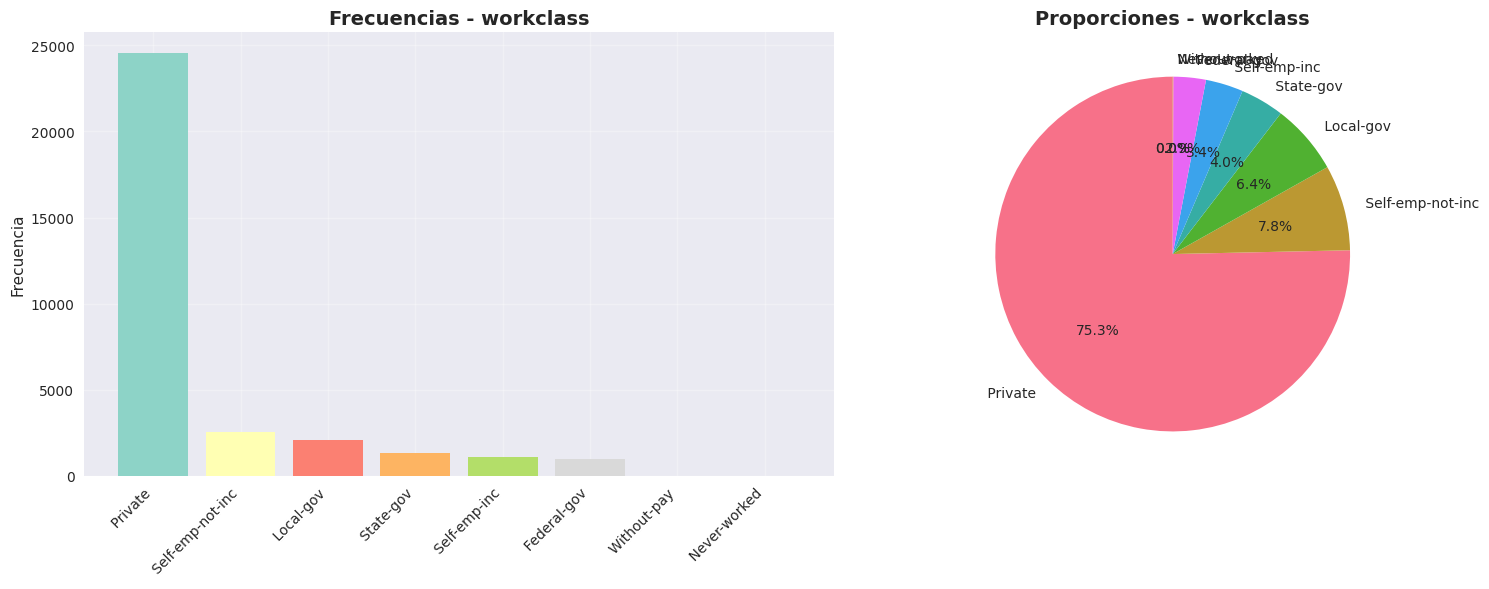


Frecuencias para workclass:
workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
--------------------------------------------------


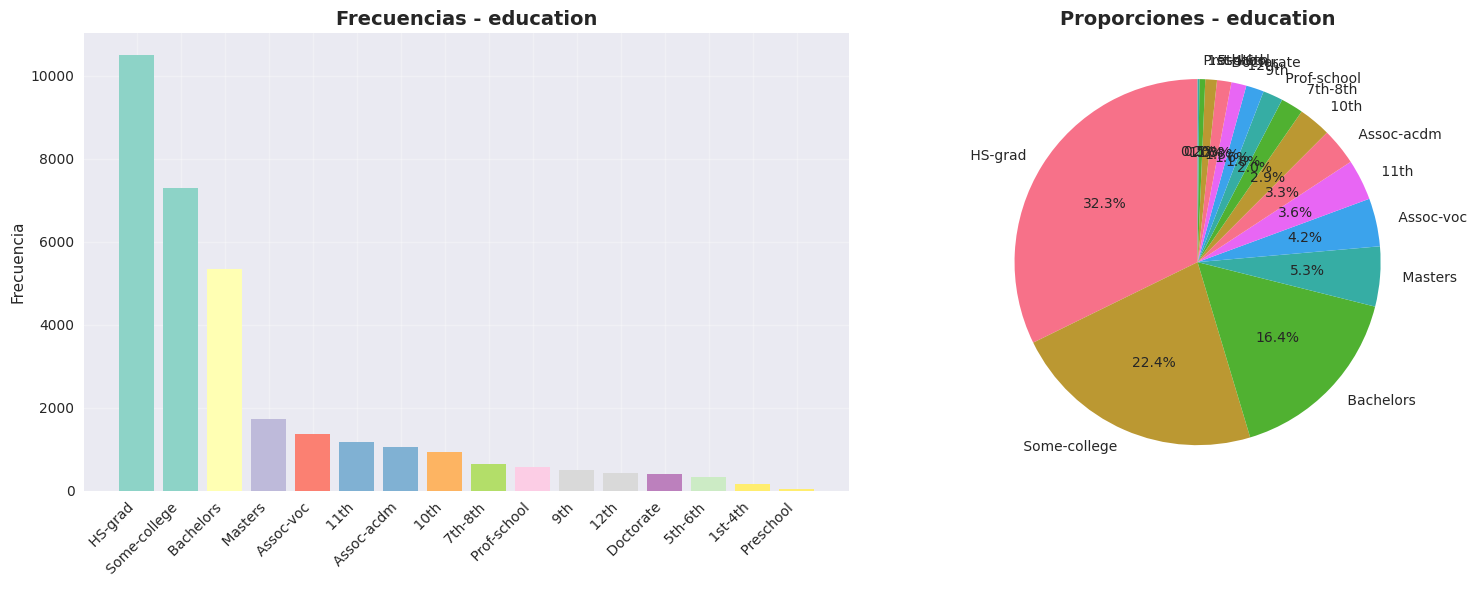


Frecuencias para education:
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
--------------------------------------------------


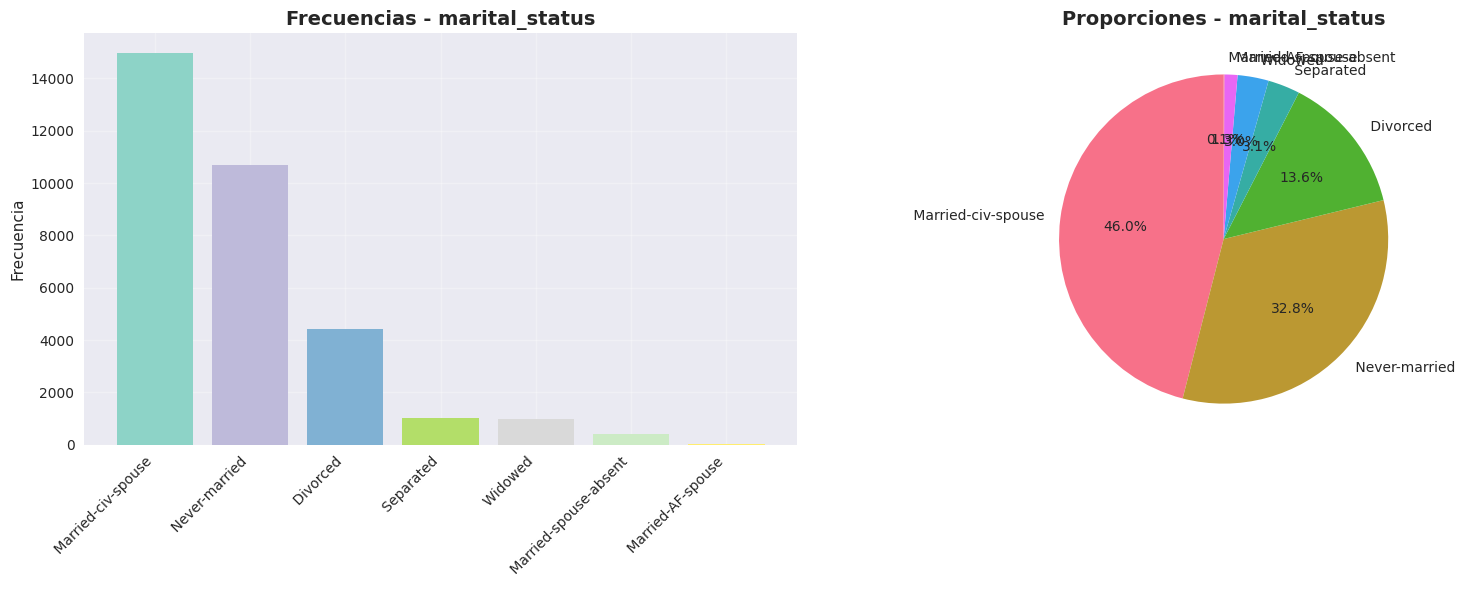


Frecuencias para marital_status:
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
--------------------------------------------------


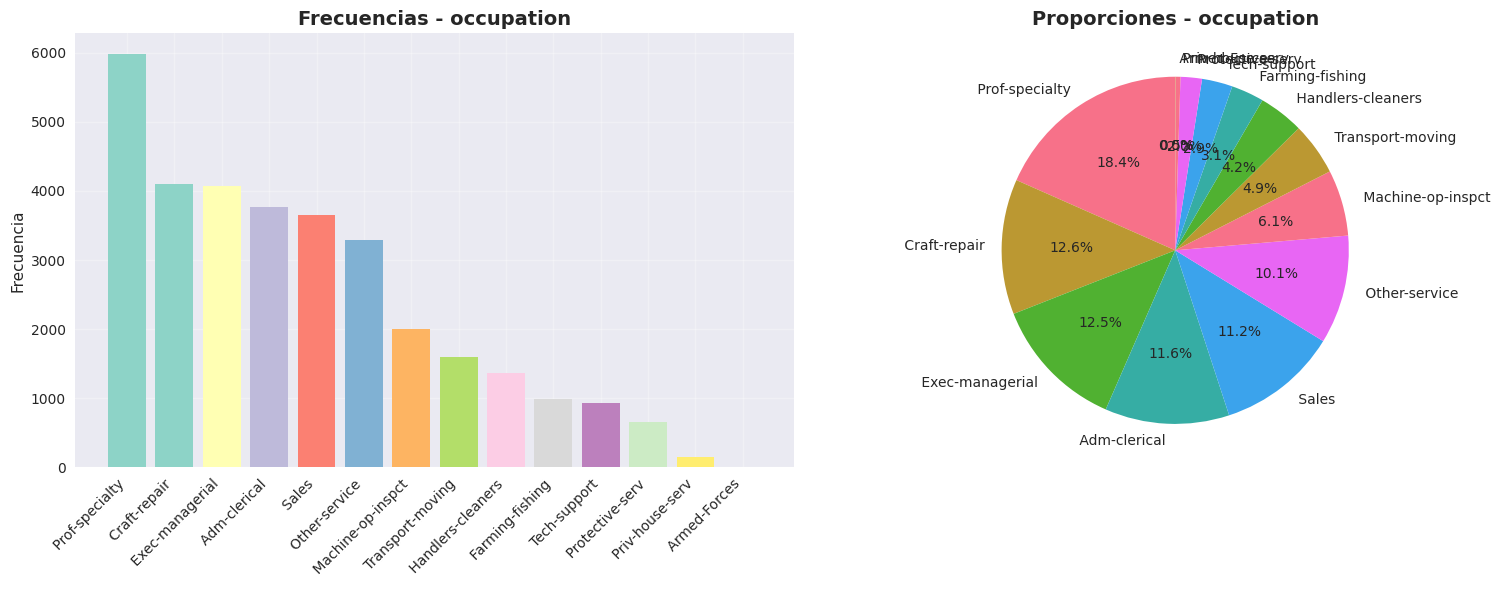


Frecuencias para occupation:
occupation
Prof-specialty       5983
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64
--------------------------------------------------


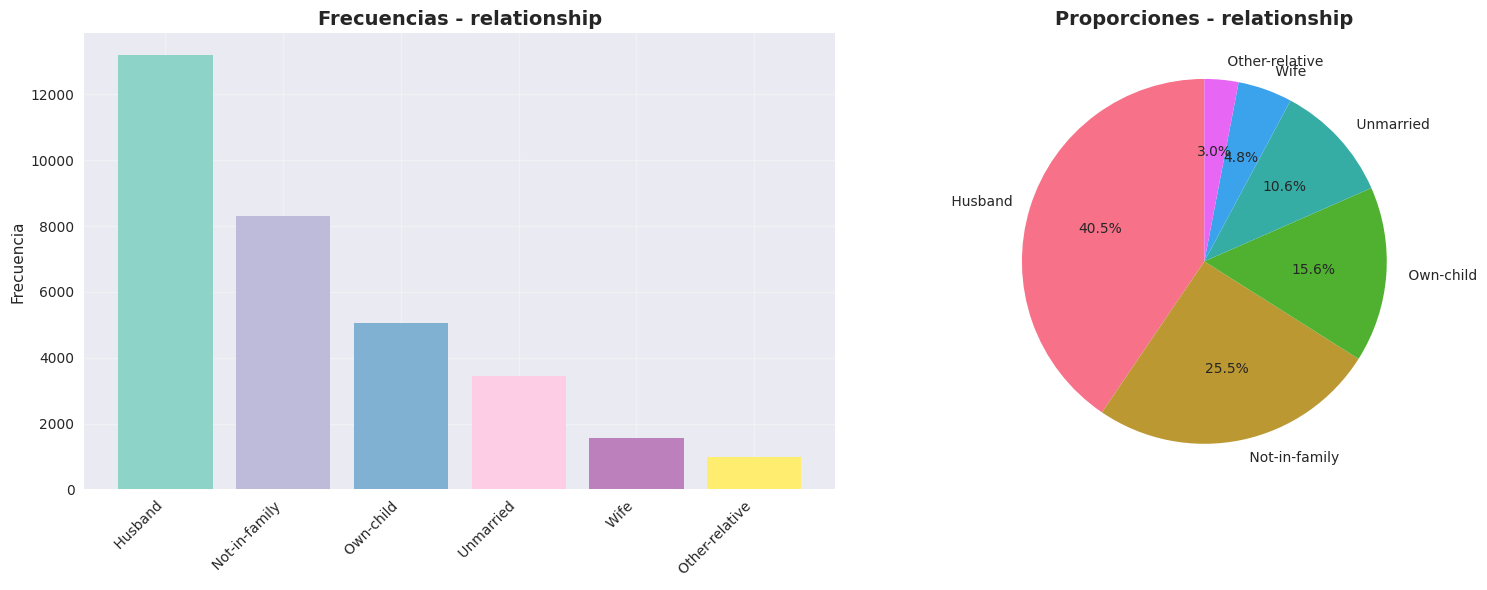


Frecuencias para relationship:
relationship
Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: count, dtype: int64
--------------------------------------------------


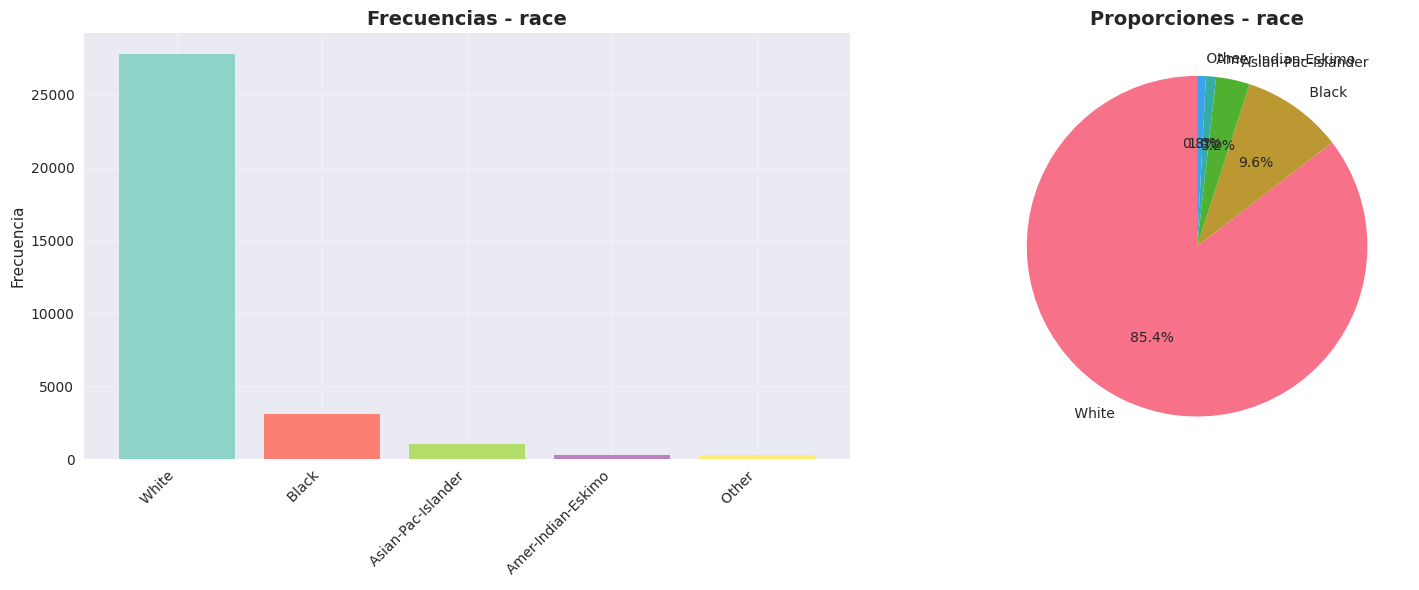


Frecuencias para race:
race
White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64
--------------------------------------------------


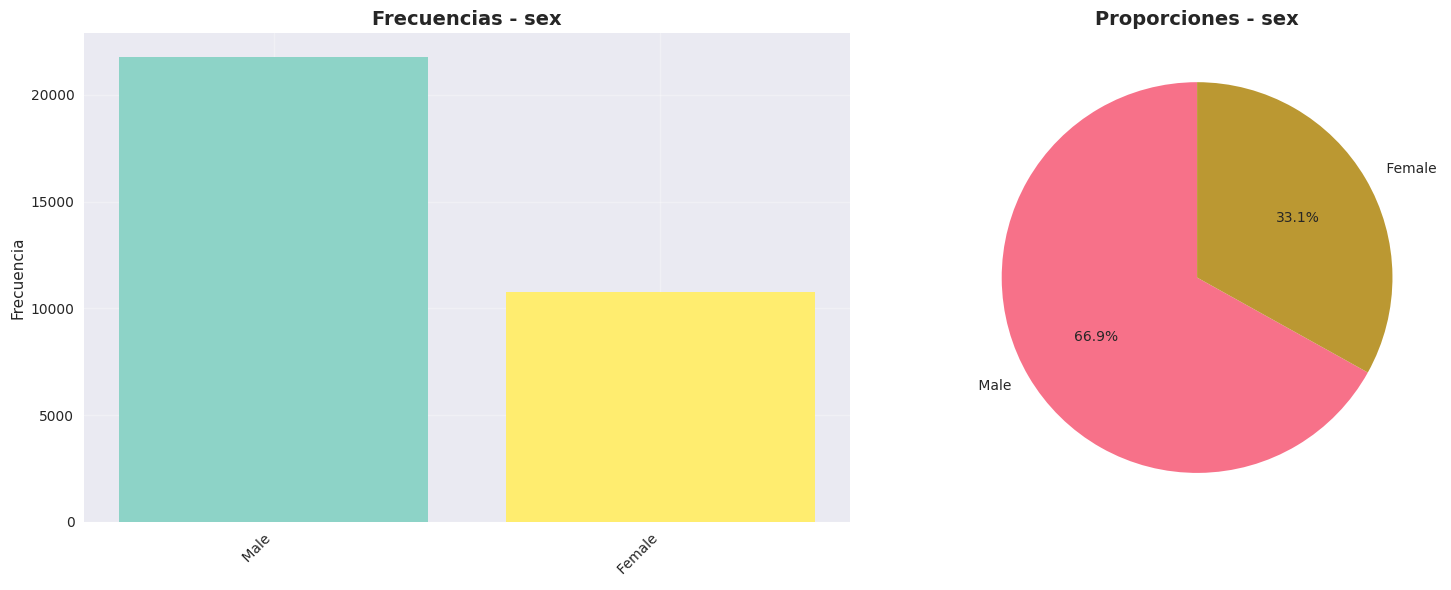


Frecuencias para sex:
sex
Male      21790
Female    10771
Name: count, dtype: int64
--------------------------------------------------


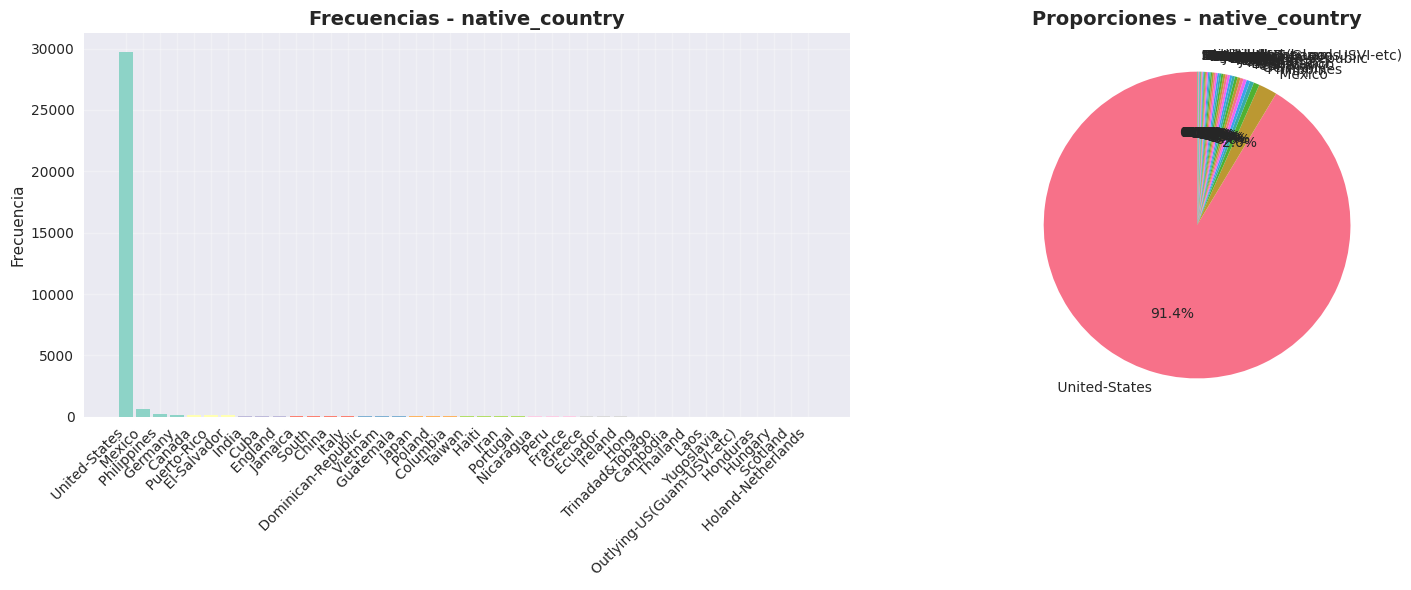


Frecuencias para native_country:
native_country
United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France         

In [81]:
print("GRÁFICOS DE BARRAS/TORTA PARA VARIABLES CATEGÓRICAS")
print("="*60)
print("Objetivo: Ver las frecuencias")

chart_vars = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']

for var in chart_vars:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    counts = df_clean[var].value_counts()
    ax1.bar(range(len(counts)), counts.values, color=plt.cm.Set3(np.linspace(0, 1, len(counts))))
    ax1.set_title(f'Frecuencias - {var}', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Frecuencia')
    ax1.set_xticks(range(len(counts)))
    ax1.set_xticklabels(counts.index, rotation=45, ha='right')
    ax1.grid(True, alpha=0.3)
    
    ax2.pie(counts.values, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax2.set_title(f'Proporciones - {var}', fontsize=14, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nFrecuencias para {var}:")
    print(counts)
    print("-" * 50)


MATRICES DE CORRELACIÓN DE PEARSON
Matriz de correlación:
                  age  fnlwgt  education_num  capital_gain  capital_loss  \
age             1.000  -0.077          0.037         0.078         0.058   
fnlwgt         -0.077   1.000         -0.043         0.000        -0.010   
education_num   0.037  -0.043          1.000         0.123         0.080   
capital_gain    0.078   0.000          0.123         1.000        -0.032   
capital_loss    0.058  -0.010          0.080        -0.032         1.000   
hours_per_week  0.069  -0.019          0.148         0.078         0.054   

                hours_per_week  
age                      0.069  
fnlwgt                  -0.019  
education_num            0.148  
capital_gain             0.078  
capital_loss             0.054  
hours_per_week           1.000  


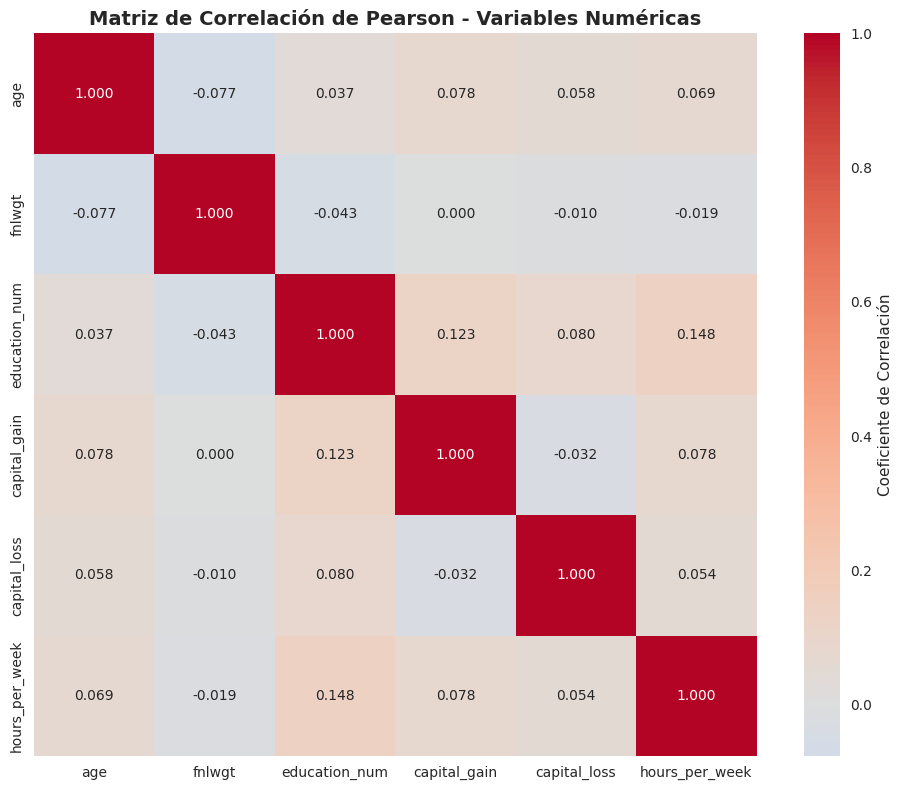


CORRELACIONES MÁS SIGNIFICATIVAS:
----------------------------------------
Clasificación de correlaciones:
- |r| ≥ 0.8: Correlación lineal FUERTE
- 0.5 ≤ |r| < 0.8: Correlación lineal DÉBIL
- |r| < 0.5: SIN correlación

 1. education_num ↔ hours_per_week: 0.148 (Sin correlación)
 2. education_num ↔ capital_gain: 0.123 (Sin correlación)
 3. education_num ↔ capital_loss: 0.080 (Sin correlación)
 4. capital_gain ↔ hours_per_week: 0.078 (Sin correlación)
 5. age ↔ capital_gain: 0.078 (Sin correlación)
 6. age ↔ fnlwgt: -0.077 (Sin correlación)
 7. age ↔ hours_per_week: 0.069 (Sin correlación)
 8. age ↔ capital_loss: 0.058 (Sin correlación)
 9. capital_loss ↔ hours_per_week: 0.054 (Sin correlación)
10. fnlwgt ↔ education_num: -0.043 (Sin correlación)


In [82]:
print("MATRICES DE CORRELACIÓN DE PEARSON")
print("="*50)

correlation_matrix = df_clean[numerical_vars].corr()

print("Matriz de correlación:")
print(correlation_matrix.round(3))

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.3f',
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Matriz de Correlación de Pearson - Variables Numéricas', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nCORRELACIONES MÁS SIGNIFICATIVAS:")
print("-" * 40)

def clasificar_correlacion(corr_value):
    abs_corr = abs(corr_value)
    if abs_corr >= 0.8:
        return "Fuerte"
    elif abs_corr >= 0.5:
        return "Débil"
    else:
        return "Sin correlación"

corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        var1 = correlation_matrix.columns[i]
        var2 = correlation_matrix.columns[j]
        corr_value = correlation_matrix.iloc[i, j]
        corr_pairs.append((var1, var2, corr_value))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print("Clasificación de correlaciones:")
print("- |r| ≥ 0.8: Correlación lineal FUERTE")
print("- 0.5 ≤ |r| < 0.8: Correlación lineal DÉBIL") 
print("- |r| < 0.5: SIN correlación")
print()

for i, (var1, var2, corr) in enumerate(corr_pairs[:10]):
    clasificacion = clasificar_correlacion(corr)
    print(f"{i+1:2d}. {var1} ↔ {var2}: {corr:.3f} ({clasificacion})")


In [83]:
print("ANÁLISIS DE OUTLIERS:")
print("="*50)

outlier_summary = {}

for var in numerical_vars:
    Q1 = df_clean[var].quantile(0.25)
    Q3 = df_clean[var].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df_clean[(df_clean[var] < lower_bound) | (df_clean[var] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df_clean)) * 100
    
    outlier_summary[var] = {
        'count': outlier_count,
        'percentage': outlier_percentage,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR
    }
    
    print(f"\n{var.upper()}:")
    print(f"  Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f"  Límites: [{lower_bound:.2f}, {upper_bound:.2f}]")
    print(f"  Outliers: {outlier_count} ({outlier_percentage:.2f}%)")
    
    if outlier_count > 0:
        print(f"  Rango de outliers: [{outliers[var].min():.2f}, {outliers[var].max():.2f}]")

print(f"\n{'='*70}")
print("RESUMEN DE OUTLIERS:")
print(f"{'='*70}")

for var, info in outlier_summary.items():
    print(f"{var:15s}: {info['count']:5d} outliers ({info['percentage']:5.2f}%)")

sorted_outliers = sorted(outlier_summary.items(), key=lambda x: x[1]['count'], reverse=True)
print(f"\nVariables con más outliers:")
for i, (var, info) in enumerate(sorted_outliers[:5]):
    print(f"{i+1}. {var}: {info['count']} outliers ({info['percentage']:.2f}%)")


ANÁLISIS DE OUTLIERS:

AGE:
  Q1: 28.00, Q3: 48.00, IQR: 20.00
  Límites: [-2.00, 78.00]
  Outliers: 143 (0.44%)
  Rango de outliers: [79.00, 90.00]

FNLWGT:
  Q1: 117827.00, Q3: 237051.00, IQR: 119224.00
  Límites: [-61009.00, 415887.00]
  Outliers: 992 (3.05%)
  Rango de outliers: [415913.00, 1484705.00]

EDUCATION_NUM:
  Q1: 9.00, Q3: 12.00, IQR: 3.00
  Límites: [4.50, 16.50]
  Outliers: 1198 (3.68%)
  Rango de outliers: [1.00, 4.00]

CAPITAL_GAIN:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Límites: [0.00, 0.00]
  Outliers: 2712 (8.33%)
  Rango de outliers: [114.00, 99999.00]

CAPITAL_LOSS:
  Q1: 0.00, Q3: 0.00, IQR: 0.00
  Límites: [0.00, 0.00]
  Outliers: 1519 (4.67%)
  Rango de outliers: [155.00, 4356.00]

HOURS_PER_WEEK:
  Q1: 40.00, Q3: 45.00, IQR: 5.00
  Límites: [32.50, 52.50]
  Outliers: 9008 (27.66%)
  Rango de outliers: [1.00, 99.00]

RESUMEN DE OUTLIERS:
age            :   143 outliers ( 0.44%)
fnlwgt         :   992 outliers ( 3.05%)
education_num  :  1198 outliers ( 3.68%)
capit

HISTOGRAMAS Y BOXPLOTS PARA VARIABLES NUMÉRICAS


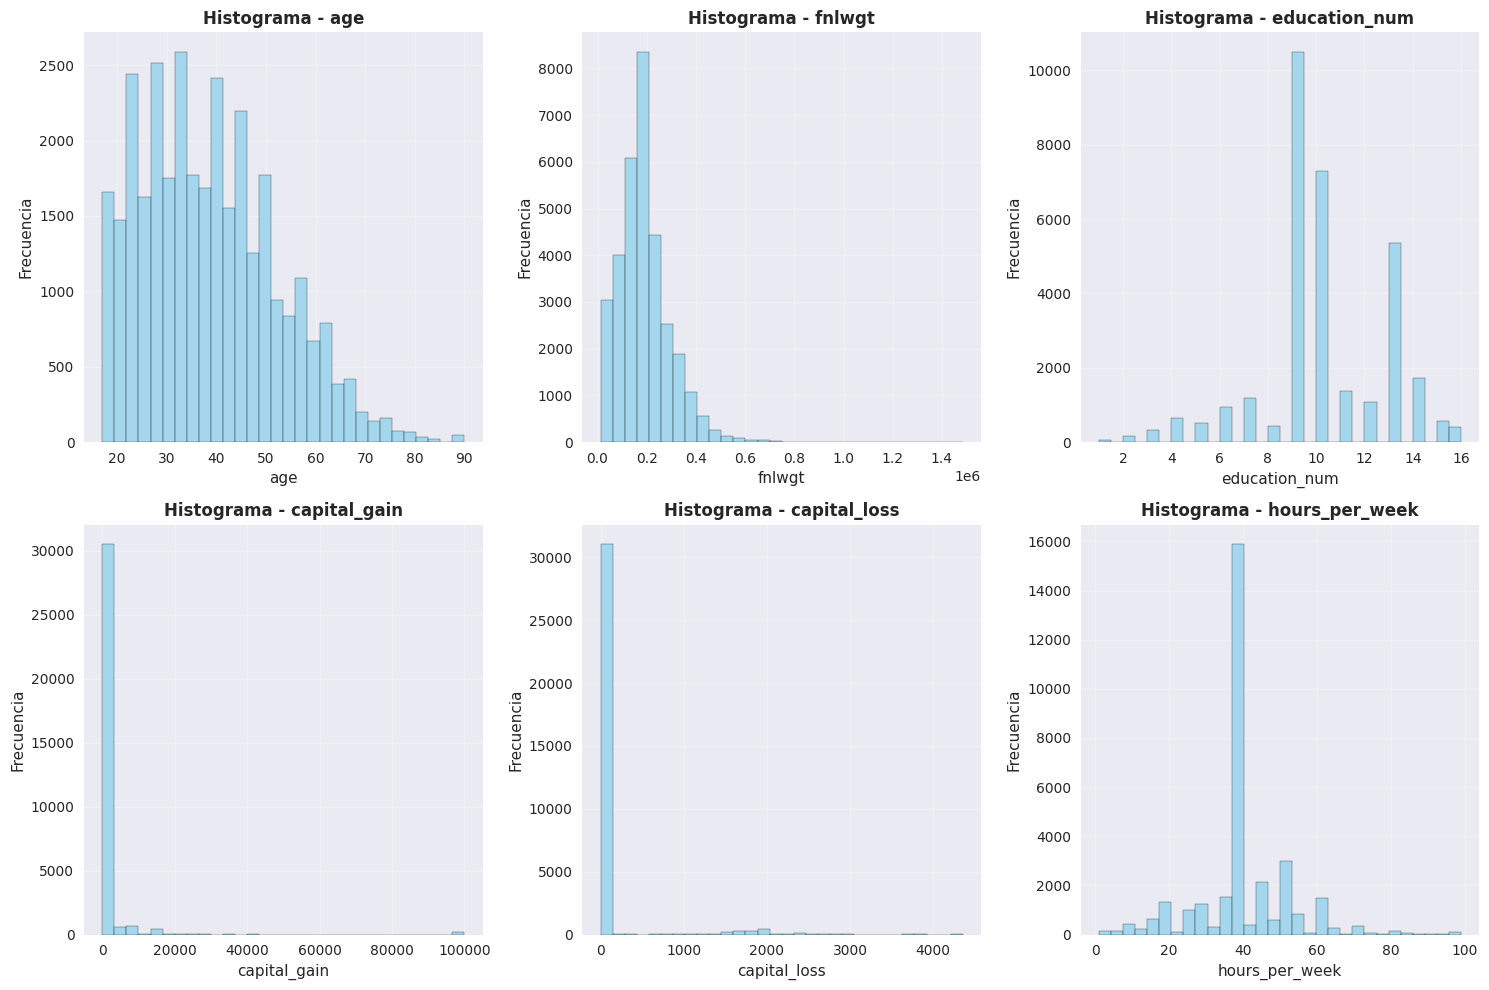

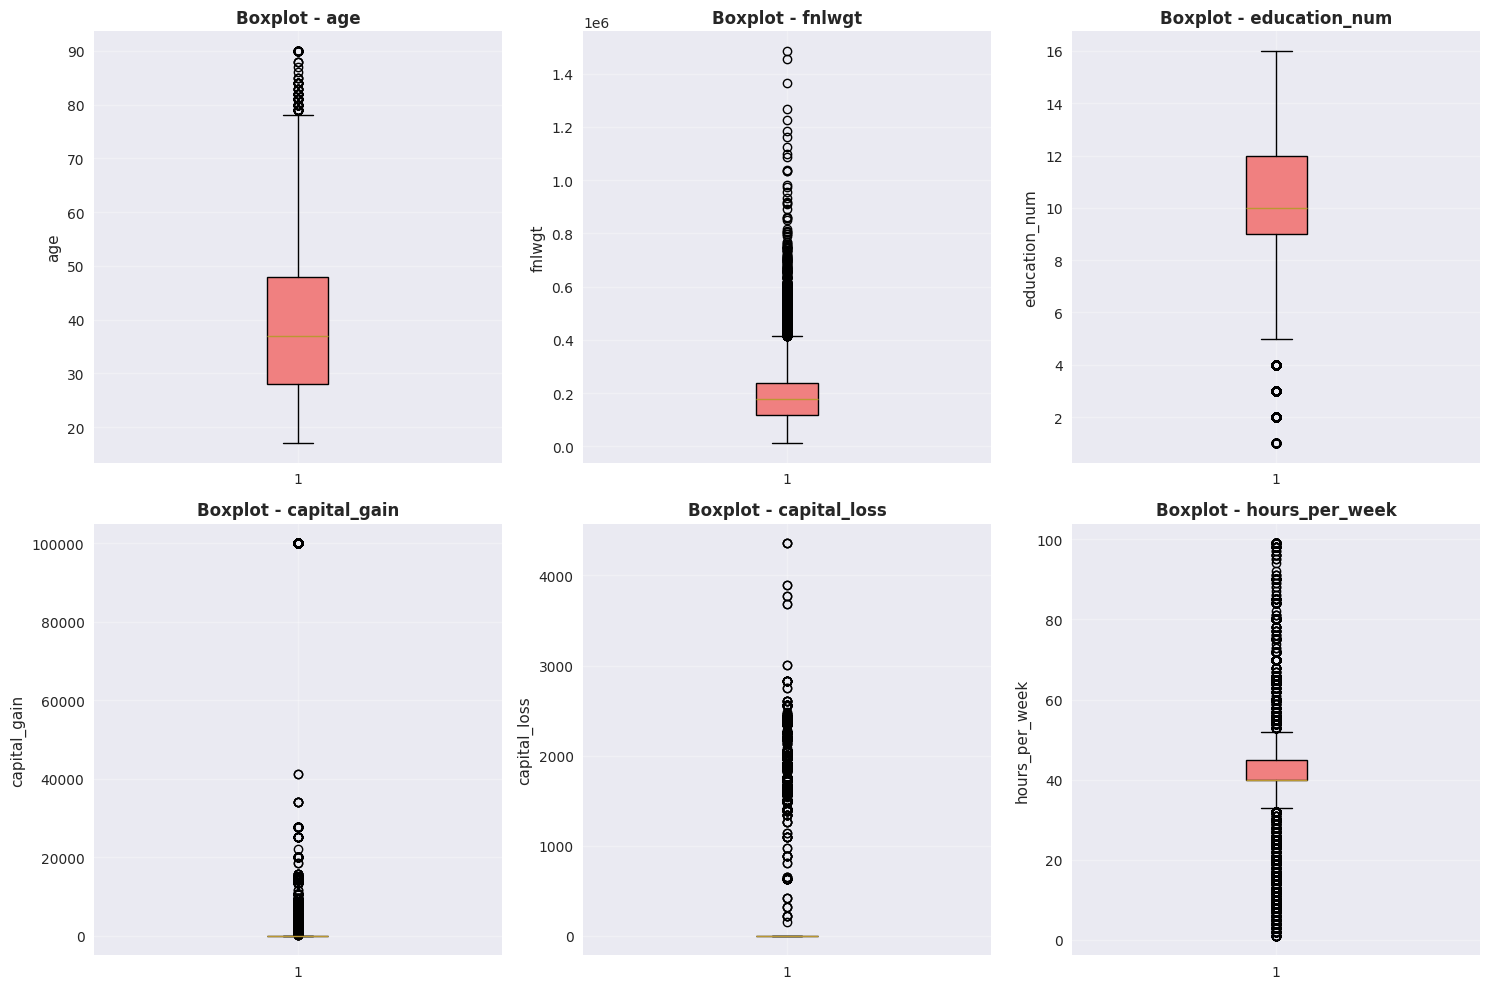


Estadísticas descriptivas adicionales:
--------------------------------------------------

AGE:
  Media: 38.58
  Mediana: 37.00
  Moda: 36
  Desviación estándar: 13.64
  Rango: [17.00, 90.00]
  Coeficiente de variación: 35.35%

FNLWGT:
  Media: 189778.37
  Mediana: 178356.00
  Moda: 123011
  Desviación estándar: 105549.98
  Rango: [12285.00, 1484705.00]
  Coeficiente de variación: 55.62%

EDUCATION_NUM:
  Media: 10.08
  Mediana: 10.00
  Moda: 9
  Desviación estándar: 2.57
  Rango: [1.00, 16.00]
  Coeficiente de variación: 25.52%

CAPITAL_GAIN:
  Media: 1077.65
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 7385.29
  Rango: [0.00, 99999.00]
  Coeficiente de variación: 685.32%

CAPITAL_LOSS:
  Media: 87.30
  Mediana: 0.00
  Moda: 0
  Desviación estándar: 402.96
  Rango: [0.00, 4356.00]
  Coeficiente de variación: 461.56%

HOURS_PER_WEEK:
  Media: 40.44
  Mediana: 40.00
  Moda: 40
  Desviación estándar: 12.35
  Rango: [1.00, 99.00]
  Coeficiente de variación: 30.53%


In [84]:
print("HISTOGRAMAS Y BOXPLOTS PARA VARIABLES NUMÉRICAS")
print("="*60)

n_vars = len(numerical_vars)
n_cols = 3
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(numerical_vars):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    ax.hist(df_clean[var], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    ax.set_title(f'Histograma - {var}', fontweight='bold')
    ax.set_xlabel(var)
    ax.set_ylabel('Frecuencia')
    ax.grid(True, alpha=0.3)

for i in range(n_vars, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
if n_rows == 1:
    axes = axes.reshape(1, -1)

for i, var in enumerate(numerical_vars):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    box_plot = ax.boxplot(df_clean[var], patch_artist=True)
    box_plot['boxes'][0].set_facecolor('lightcoral')
    ax.set_title(f'Boxplot - {var}', fontweight='bold')
    ax.set_ylabel(var)
    ax.grid(True, alpha=0.3)

for i in range(n_vars, n_rows * n_cols):
    row = i // n_cols
    col = i % n_cols
    axes[row, col].set_visible(False)

plt.tight_layout()
plt.show()

print("\nEstadísticas descriptivas adicionales:")
print("-" * 50)
for var in numerical_vars:
    print(f"\n{var.upper()}:")
    print(f"  Media: {df_clean[var].mean():.2f}")
    print(f"  Mediana: {df_clean[var].median():.2f}")
    print(f"  Moda: {df_clean[var].mode().iloc[0] if not df_clean[var].mode().empty else 'No hay moda única'}")
    print(f"  Desviación estándar: {df_clean[var].std():.2f}")
    print(f"  Rango: [{df_clean[var].min():.2f}, {df_clean[var].max():.2f}]")
    print(f"  Coeficiente de variación: {(df_clean[var].std() / df_clean[var].mean() * 100):.2f}%")


In [85]:
def weighted_mean(x, w):
    return (x * w).sum() / w.sum()

def weighted_proportion(x, w):
    return weighted_mean(x, w)

def compare_weighted_unweighted(df, group_var, target_var='income_binary', weight_var='fnlwgt'):
    unweighted = df.groupby(group_var)[target_var].mean()
    
    weighted = df.groupby(group_var).apply(
        lambda g: weighted_proportion(g[target_var], g[weight_var])
    )
    
    comparison = pd.DataFrame({
        'Proporción_No_Ponderada': unweighted,
        'Proporción_Ponderada': weighted
    })
    
    comparison['Diferencia'] = comparison['Proporción_Ponderada'] - comparison['Proporción_No_Ponderada']
    comparison['Diferencia_Porcentual'] = (comparison['Diferencia'] / comparison['Proporción_No_Ponderada']) * 100
    
    return comparison

def plot_comparison(comparison_df, group_var, title_suffix=""):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    x_pos = range(len(comparison_df))
    width = 0.35
    
    ax1.bar([x - width/2 for x in x_pos], comparison_df['Proporción_No_Ponderada'], 
            width, label='No Ponderado', alpha=0.8, color='skyblue')
    ax1.bar([x + width/2 for x in x_pos], comparison_df['Proporción_Ponderada'], 
            width, label='Ponderado por fnlwgt', alpha=0.8, color='lightcoral')
    
    ax1.set_xlabel(group_var)
    ax1.set_ylabel('Proporción de Ingreso Alto (>50K)')
    ax1.set_title(f'Comparación: Ponderado vs No Ponderado - {group_var} {title_suffix}')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(comparison_df.index, rotation=45, ha='right')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    colors = ['red' if x < 0 else 'green' for x in comparison_df['Diferencia_Porcentual']]
    ax2.bar(range(len(comparison_df)), comparison_df['Diferencia_Porcentual'], 
            color=colors, alpha=0.7)
    ax2.set_xlabel(group_var)
    ax2.set_ylabel('Diferencia Porcentual (%)')
    ax2.set_title(f'Diferencia: Ponderado - No Ponderado (%) - {group_var} {title_suffix}')
    ax2.set_xticks(range(len(comparison_df)))
    ax2.set_xticklabels(comparison_df.index, rotation=45, ha='right')
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("Funciones auxiliares para análisis ponderado definidas correctamente")


Funciones auxiliares para análisis ponderado definidas correctamente


ANÁLISIS PONDERADO: INGRESO POR SEXO
Comparación de proporciones de ingreso alto por sexo:
------------------------------------------------------------
        Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
sex                                                                 
Female                   0.1095                0.1082     -0.0012   
Male                     0.3057                0.3010     -0.0048   

        Diferencia_Porcentual  
sex                            
Female                -1.1084  
Male                  -1.5656  

Interpretación:
--------------------
•  Female: La ponderación DISMINUYE la proporción en 1.11% (sub-representado en muestra)
•  Male: La ponderación DISMINUYE la proporción en 1.57% (sub-representado en muestra)


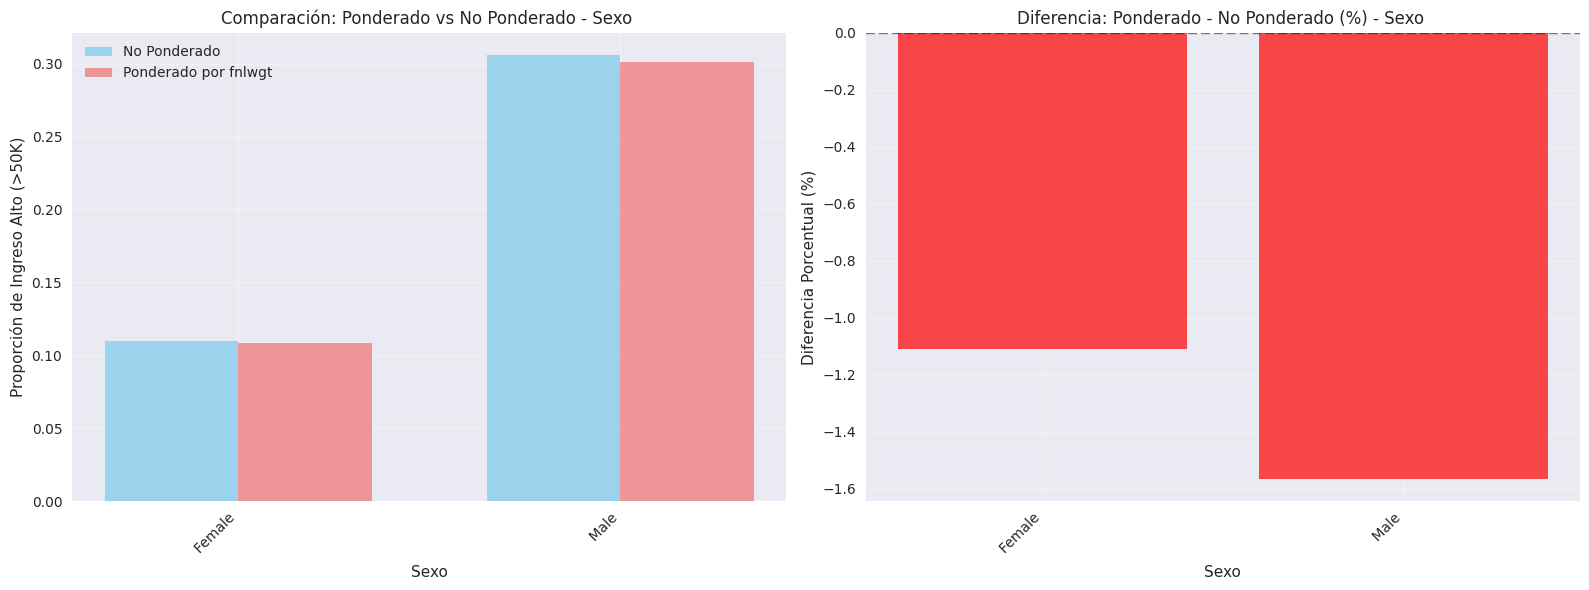


Resumen estadístico:
• Diferencia promedio entre métodos: 0.0030
• Diferencia máxima: 0.0048
• Grupo con mayor diferencia:  Male


In [86]:
print("ANÁLISIS PONDERADO: INGRESO POR SEXO")
print("="*50)

sex_comparison = compare_weighted_unweighted(df_clean, 'sex')

print("Comparación de proporciones de ingreso alto por sexo:")
print("-" * 60)
print(sex_comparison.round(4))

print("\nInterpretación:")
print("-" * 20)
for sex in sex_comparison.index:
    diff_pct = sex_comparison.loc[sex, 'Diferencia_Porcentual']
    if diff_pct > 0:
        print(f"• {sex}: La ponderación AUMENTA la proporción en {abs(diff_pct):.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {sex}: La ponderación DISMINUYE la proporción en {abs(diff_pct):.2f}% (sub-representado en muestra)")

plot_comparison(sex_comparison, 'Sexo')

print("\nResumen estadístico:")
print(f"• Diferencia promedio entre métodos: {sex_comparison['Diferencia'].abs().mean():.4f}")
print(f"• Diferencia máxima: {sex_comparison['Diferencia'].abs().max():.4f}")
print(f"• Grupo con mayor diferencia: {sex_comparison['Diferencia'].abs().idxmax()}")


ANÁLISIS PONDERADO: INGRESO POR RAZA
Comparación de proporciones de ingreso alto por raza:
------------------------------------------------------------
                    Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
race                                                                            
Amer-Indian-Eskimo                   0.1158                0.1244      0.0086   
Asian-Pac-Islander                   0.2656                0.2762      0.0106   
Black                                0.1239                0.1283      0.0044   
Other                                0.0923                0.0907     -0.0015   
White                                0.2559                0.2548     -0.0011   

                    Diferencia_Porcentual  
race                                       
Amer-Indian-Eskimo                 7.4378  
Asian-Pac-Islander                 3.9721  
Black                              3.5838  
Other                             -1.6291  
White           

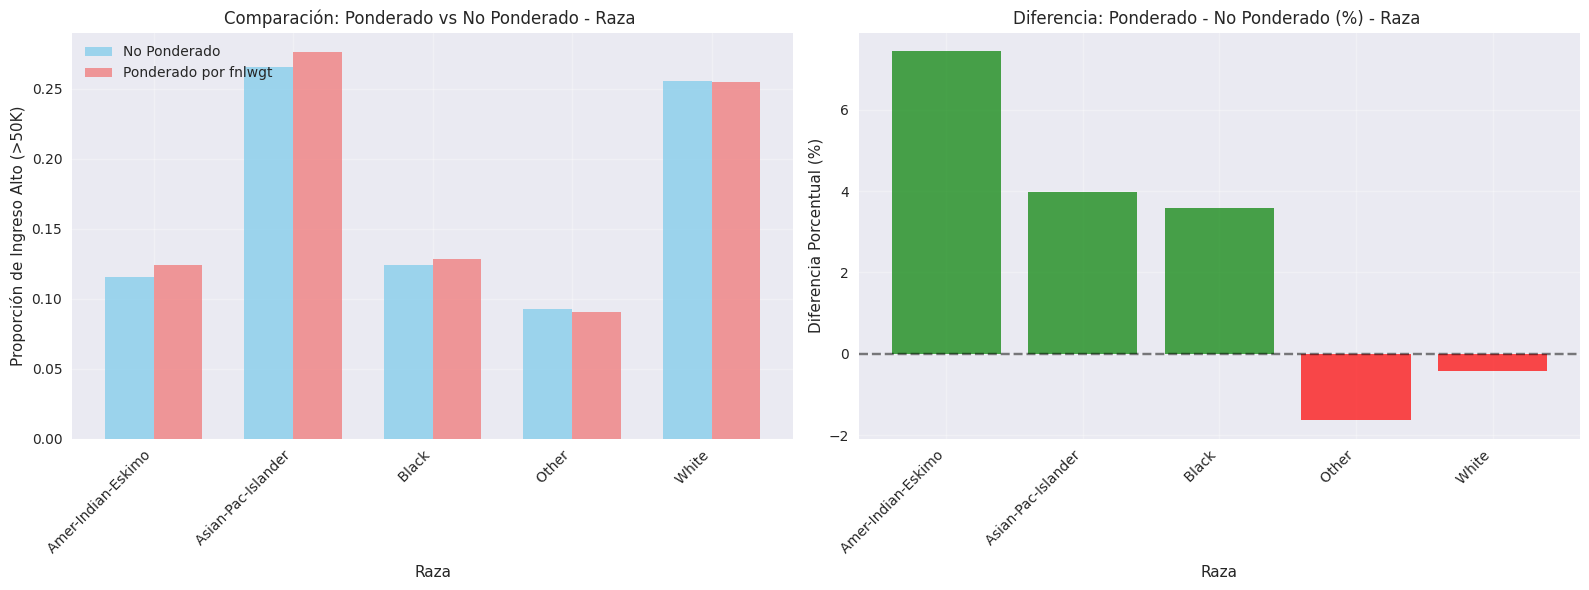


Resumen estadístico:
• Diferencia promedio entre métodos: 0.0052
• Diferencia máxima: 0.0106
• Grupo con mayor diferencia:  Asian-Pac-Islander

Grupos ordenados por magnitud de diferencia:
--------------------------------------------------
1.  Amer-Indian-Eskimo: +7.44%
2.  Asian-Pac-Islander: +3.97%
3.  Black: +3.58%
4.  Other: -1.63%
5.  White: -0.43%


In [87]:
print("ANÁLISIS PONDERADO: INGRESO POR RAZA")
print("="*50)

race_comparison = compare_weighted_unweighted(df_clean, 'race')

print("Comparación de proporciones de ingreso alto por raza:")
print("-" * 60)
print(race_comparison.round(4))

print("\nInterpretación:")
print("-" * 20)
for race in race_comparison.index:
    diff_pct = race_comparison.loc[race, 'Diferencia_Porcentual']
    if diff_pct > 0:
        print(f"• {race}: La ponderación AUMENTA la proporción en {abs(diff_pct):.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {race}: La ponderación DISMINUYE la proporción en {abs(diff_pct):.2f}% (sub-representado en muestra)")

plot_comparison(race_comparison, 'Raza')

print("\nResumen estadístico:")
print(f"• Diferencia promedio entre métodos: {race_comparison['Diferencia'].abs().mean():.4f}")
print(f"• Diferencia máxima: {race_comparison['Diferencia'].abs().max():.4f}")
print(f"• Grupo con mayor diferencia: {race_comparison['Diferencia'].abs().idxmax()}")

print(f"\nGrupos ordenados por magnitud de diferencia:")
print("-" * 50)
race_sorted = race_comparison.sort_values('Diferencia_Porcentual', key=abs, ascending=False)
for i, (race, row) in enumerate(race_sorted.iterrows(), 1):
    print(f"{i}. {race}: {row['Diferencia_Porcentual']:+.2f}%")


ANÁLISIS PONDERADO: INGRESO POR OCUPACIÓN
Comparación de proporciones de ingreso alto por ocupación:
------------------------------------------------------------
                   Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
occupation                                                                     
Adm-clerical                        0.1345                0.1308     -0.0037   
Armed-Forces                        0.1111                0.1776      0.0665   
Craft-repair                        0.2266                0.2286      0.0019   
Exec-managerial                     0.4840                0.4828     -0.0012   
Farming-fishing                     0.1157                0.0915     -0.0242   
Handlers-cleaners                   0.0628                0.0580     -0.0047   
Machine-op-inspct                   0.1249                0.1203     -0.0045   
Other-service                       0.0416                0.0406     -0.0010   
Priv-house-serv                     0.

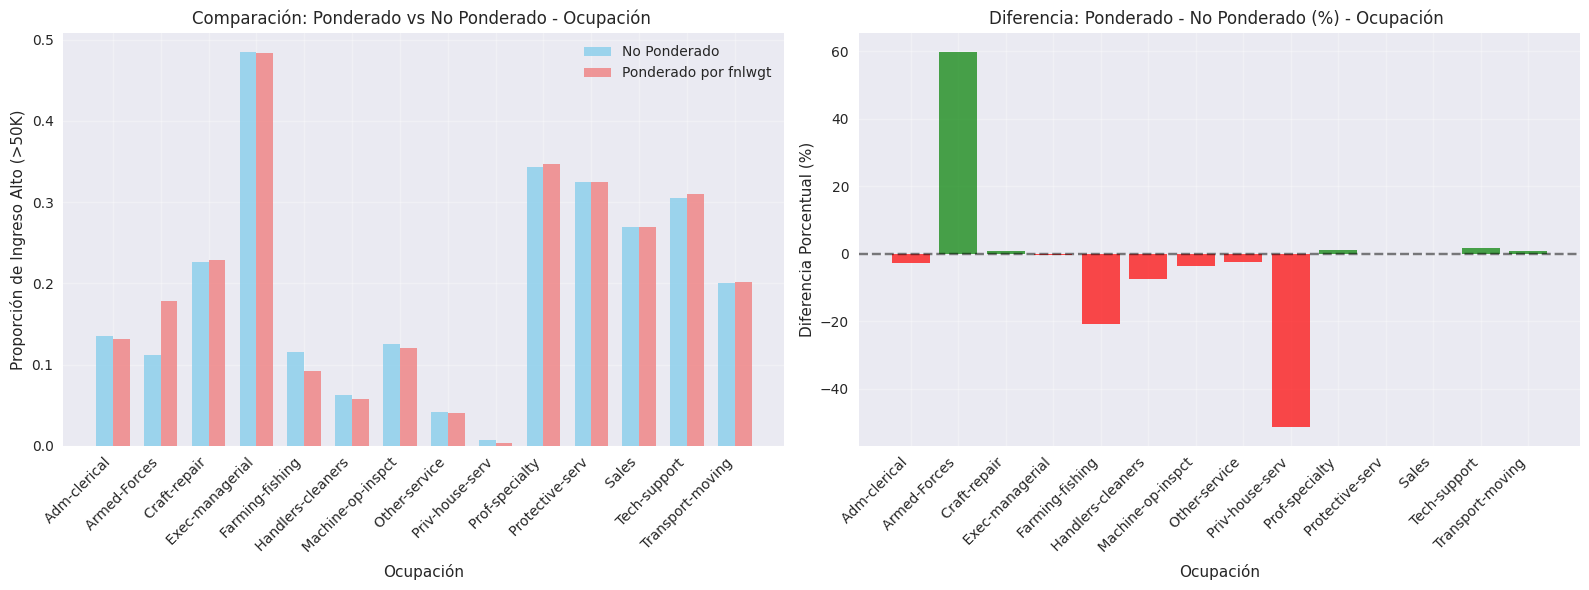


Resumen estadístico:
• Diferencia promedio entre métodos: 0.0087
• Diferencia máxima: 0.0665
• Grupo con mayor diferencia:  Armed-Forces

Ocupaciones ordenadas por magnitud de diferencia:
--------------------------------------------------
 1.  Armed-Forces: +59.88%
 2.  Priv-house-serv: -51.33%
 3.  Farming-fishing: -20.90%
 4.  Handlers-cleaners: -7.57%
 5.  Machine-op-inspct: -3.63%
 6.  Adm-clerical: -2.72%
 7.  Other-service: -2.42%
 8.  Tech-support: +1.63%
 9.  Prof-specialty: +1.07%
10.  Craft-repair: +0.84%

Ocupaciones con mayor proporción de ingresos altos (ponderado):
------------------------------------------------------------
1.  Exec-managerial: 0.483 (48.3%)
2.  Prof-specialty: 0.346 (34.6%)
3.  Protective-serv: 0.325 (32.5%)
4.  Tech-support: 0.310 (31.0%)
5.  Sales: 0.269 (26.9%)


In [88]:
print("ANÁLISIS PONDERADO: INGRESO POR OCUPACIÓN")
print("="*50)

occupation_comparison = compare_weighted_unweighted(df_clean, 'occupation')

print("Comparación de proporciones de ingreso alto por ocupación:")
print("-" * 60)
print(occupation_comparison.round(4))

print("\nInterpretación:")
print("-" * 20)
for occupation in occupation_comparison.index:
    diff_pct = occupation_comparison.loc[occupation, 'Diferencia_Porcentual']
    if diff_pct > 0:
        print(f"• {occupation}: La ponderación AUMENTA la proporción en {abs(diff_pct):.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {occupation}: La ponderación DISMINUYE la proporción en {abs(diff_pct):.2f}% (sub-representado en muestra)")

plot_comparison(occupation_comparison, 'Ocupación')

print("\nResumen estadístico:")
print(f"• Diferencia promedio entre métodos: {occupation_comparison['Diferencia'].abs().mean():.4f}")
print(f"• Diferencia máxima: {occupation_comparison['Diferencia'].abs().max():.4f}")
print(f"• Grupo con mayor diferencia: {occupation_comparison['Diferencia'].abs().idxmax()}")

print(f"\nOcupaciones ordenadas por magnitud de diferencia:")
print("-" * 50)
occupation_sorted = occupation_comparison.sort_values('Diferencia_Porcentual', key=abs, ascending=False)
for i, (occupation, row) in enumerate(occupation_sorted.head(10).iterrows(), 1):
    print(f"{i:2d}. {occupation}: {row['Diferencia_Porcentual']:+.2f}%")

print(f"\nOcupaciones con mayor proporción de ingresos altos (ponderado):")
print("-" * 60)
top_occupations = occupation_comparison.sort_values('Proporción_Ponderada', ascending=False).head(5)
for i, (occupation, row) in enumerate(top_occupations.iterrows(), 1):
    print(f"{i}. {occupation}: {row['Proporción_Ponderada']:.3f} ({row['Proporción_Ponderada']*100:.1f}%)")


ANÁLISIS PONDERADO: INGRESO POR EDUCACIÓN
Comparación de proporciones de ingreso alto por educación:
------------------------------------------------------------
              Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
education                                                                 
10th                           0.0665                0.0668      0.0004   
11th                           0.0511                0.0441     -0.0069   
12th                           0.0762                0.0806      0.0044   
1st-4th                        0.0357                0.0343     -0.0014   
5th-6th                        0.0480                0.0348     -0.0132   
7th-8th                        0.0619                0.0577     -0.0042   
9th                            0.0525                0.0431     -0.0095   
Assoc-acdm                     0.2484                0.2458     -0.0026   
Assoc-voc                      0.2612                0.2617      0.0005   
Bachelors    

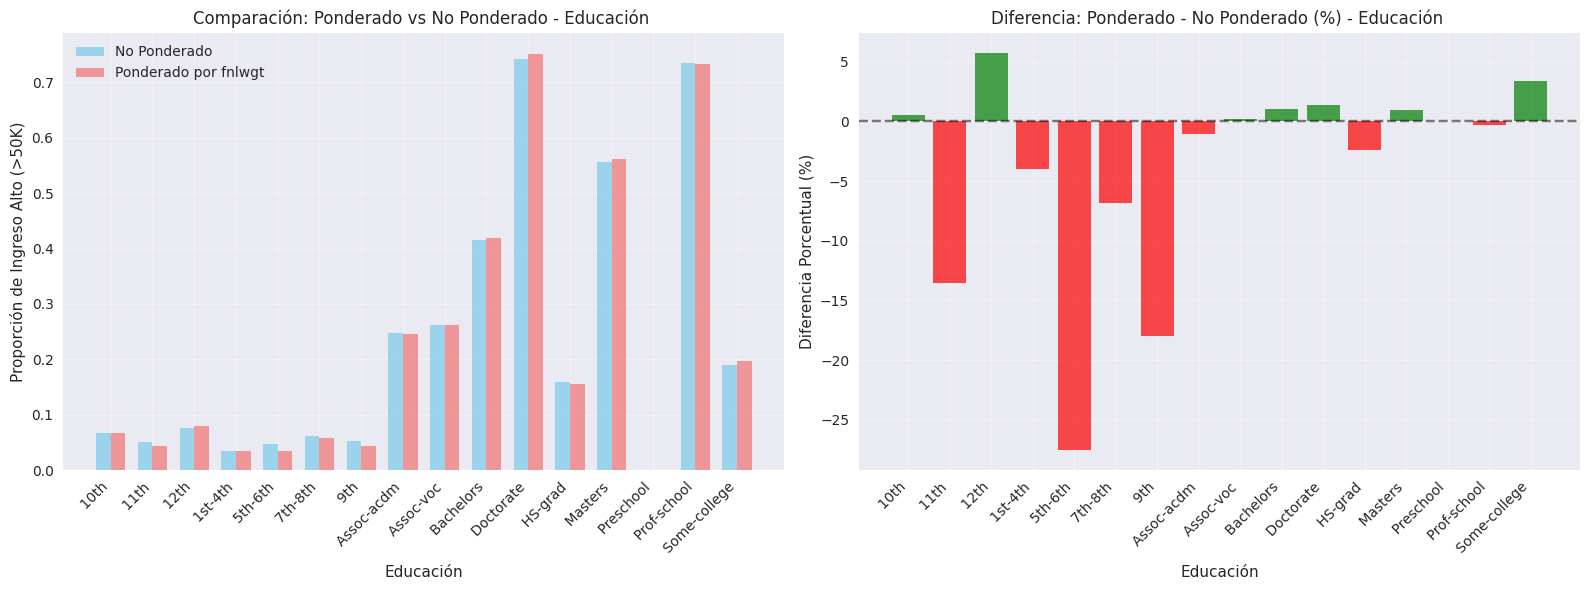


Resumen estadístico:
• Diferencia promedio entre métodos: 0.0047
• Diferencia máxima: 0.0132
• Grupo con mayor diferencia:  5th-6th

Niveles de educación ordenados por magnitud de diferencia:
--------------------------------------------------
 1.  5th-6th: -27.57%
 2.  9th: -18.01%
 3.  11th: -13.55%
 4.  7th-8th: -6.84%
 5.  12th: +5.75%
 6.  1st-4th: -4.00%
 7.  Some-college: +3.39%
 8.  HS-grad: -2.40%
 9.  Doctorate: +1.40%
10.  Assoc-acdm: -1.04%

Niveles de educación con mayor proporción de ingresos altos (ponderado):
------------------------------------------------------------
1.  Doctorate: 0.751 (75.1%)
2.  Prof-school: 0.732 (73.2%)
3.  Masters: 0.562 (56.2%)
4.  Bachelors: 0.419 (41.9%)
5.  Assoc-voc: 0.262 (26.2%)

Correlación entre años de educación y proporción de ingresos altos:
------------------------------------------------------------
Correlación Pearson: 0.8967


In [89]:
print("ANÁLISIS PONDERADO: INGRESO POR EDUCACIÓN")
print("="*50)

education_comparison = compare_weighted_unweighted(df_clean, 'education')

print("Comparación de proporciones de ingreso alto por educación:")
print("-" * 60)
print(education_comparison.round(4))

print("\nInterpretación:")
print("-" * 20)
for education in education_comparison.index:
    diff_pct = education_comparison.loc[education, 'Diferencia_Porcentual']
    if diff_pct > 0:
        print(f"• {education}: La ponderación AUMENTA la proporción en {abs(diff_pct):.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {education}: La ponderación DISMINUYE la proporción en {abs(diff_pct):.2f}% (sub-representado en muestra)")

plot_comparison(education_comparison, 'Educación')

print("\nResumen estadístico:")
print(f"• Diferencia promedio entre métodos: {education_comparison['Diferencia'].abs().mean():.4f}")
print(f"• Diferencia máxima: {education_comparison['Diferencia'].abs().max():.4f}")
print(f"• Grupo con mayor diferencia: {education_comparison['Diferencia'].abs().idxmax()}")

print(f"\nNiveles de educación ordenados por magnitud de diferencia:")
print("-" * 50)
education_sorted = education_comparison.sort_values('Diferencia_Porcentual', key=abs, ascending=False)
for i, (education, row) in enumerate(education_sorted.head(10).iterrows(), 1):
    print(f"{i:2d}. {education}: {row['Diferencia_Porcentual']:+.2f}%")

print(f"\nNiveles de educación con mayor proporción de ingresos altos (ponderado):")
print("-" * 60)
top_education = education_comparison.sort_values('Proporción_Ponderada', ascending=False).head(5)
for i, (education, row) in enumerate(top_education.iterrows(), 1):
    print(f"{i}. {education}: {row['Proporción_Ponderada']:.3f} ({row['Proporción_Ponderada']*100:.1f}%)")

print(f"\nCorrelación entre años de educación y proporción de ingresos altos:")
print("-" * 60)
education_numeric = df_clean.groupby('education').agg({
    'education_num': 'first',
    'fnlwgt': 'sum'
}).reset_index()

education_numeric['weighted_income_prop'] = education_numeric['education'].map(education_comparison['Proporción_Ponderada'])
correlation = education_numeric['education_num'].corr(education_numeric['weighted_income_prop'])
print(f"Correlación Pearson: {correlation:.4f}")


ANÁLISIS PONDERADO: VARIABLES ADICIONALES

1. ANÁLISIS POR WORKCLASS
------------------------------
Comparación de proporciones de ingreso alto por workclass:
                  Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
workclass                                                                     
Federal-gov                        0.3865                0.3910      0.0045   
Local-gov                          0.2948                0.3019      0.0071   
Never-worked                       0.0000                0.0000      0.0000   
Private                            0.2101                0.2062     -0.0039   
Self-emp-inc                       0.5573                0.5798      0.0225   
Self-emp-not-inc                   0.2849                0.2969      0.0120   
State-gov                          0.2720                0.2748      0.0028   
Without-pay                        0.0000                0.0000      0.0000   

                  Diferencia_Porcentual  
workclas

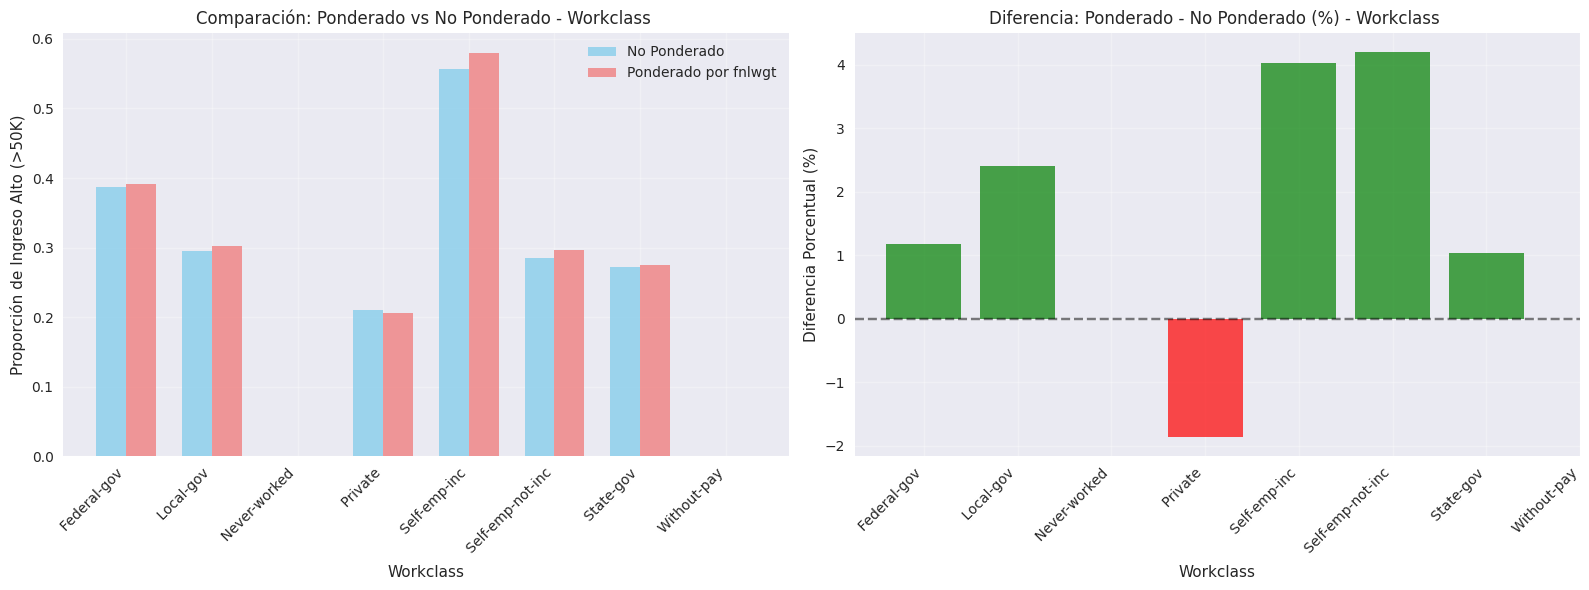

Diferencia promedio: 0.0066

2. ANÁLISIS POR MARITAL_STATUS
------------------------------
Comparación de proporciones de ingreso alto por marital_status:
                       Proporción_No_Ponderada  Proporción_Ponderada  \
marital_status                                                         
Divorced                                0.1042                0.1040   
Married-AF-spouse                       0.4348                0.3845   
Married-civ-spouse                      0.4468                0.4496   
Married-spouse-absent                   0.0813                0.0671   
Never-married                           0.0460                0.0462   
Separated                               0.0644                0.0657   
Widowed                                 0.0856                0.0784   

                       Diferencia  Diferencia_Porcentual  
marital_status                                            
Divorced                  -0.0002                -0.2030  
Married-AF-spouse  

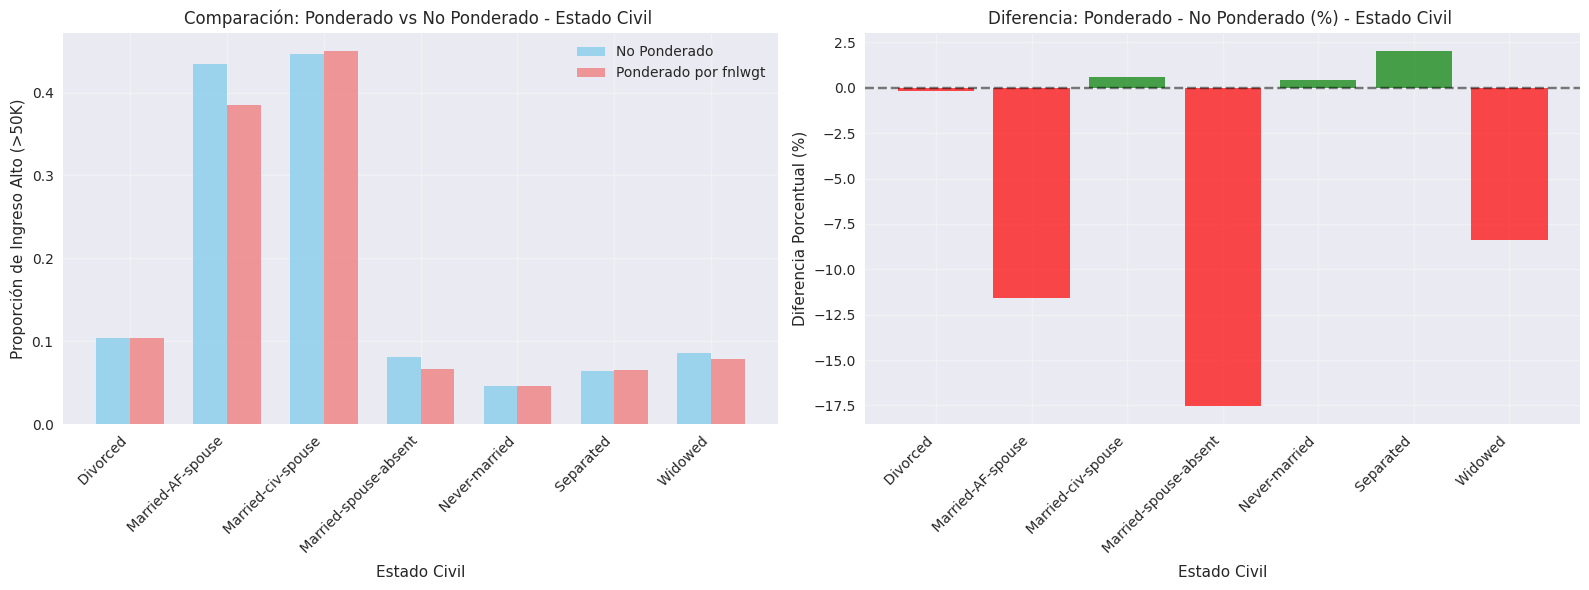

Diferencia promedio: 0.0109

3. ANÁLISIS POR GRUPOS DE EDAD
------------------------------
Comparación de proporciones de ingreso alto por grupos de edad:
           Proporción_No_Ponderada  Proporción_Ponderada  Diferencia  \
age_group                                                              
18-25                       0.0178                0.0184      0.0006   
26-35                       0.1869                0.1881      0.0012   
36-45                       0.3464                0.3491      0.0028   
46-55                       0.3983                0.4051      0.0068   
56-65                       0.3149                0.3211      0.0062   
65+                         0.2012                0.1919     -0.0093   

           Diferencia_Porcentual  
age_group                         
18-25                     3.5599  
26-35                     0.6325  
36-45                     0.7956  
46-55                     1.7094  
56-65                     1.9772  
65+                    

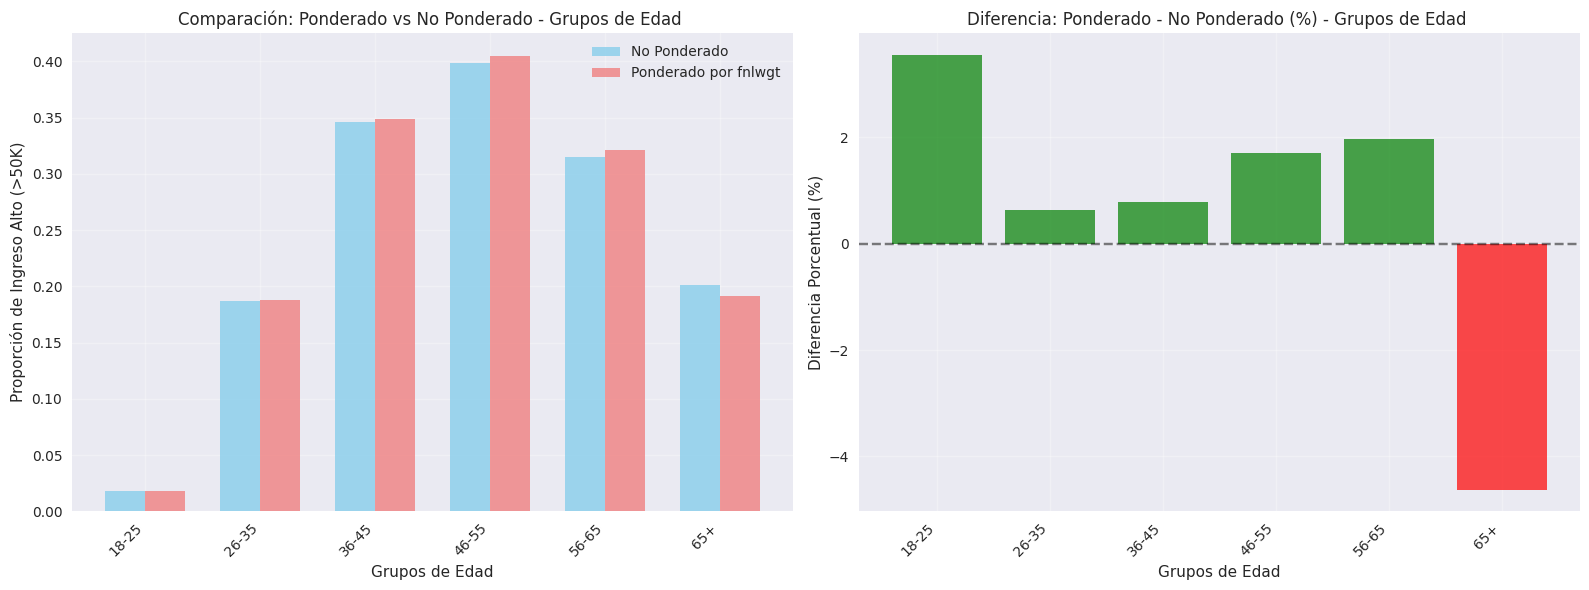

Diferencia promedio: 0.0045

RESUMEN COMPARATIVO DE TODAS LAS VARIABLES
Diferencia promedio absoluta por variable:
--------------------------------------------------
Sexo           : 0.0030 (máx: 0.0048)
Raza           : 0.0052 (máx: 0.0106)
Ocupación      : 0.0087 (máx: 0.0665)
Educación      : 0.0047 (máx: 0.0132)
Workclass      : 0.0066 (máx: 0.0225)
Estado Civil   : 0.0109 (máx: 0.0503)
Grupos de Edad : 0.0045 (máx: 0.0093)

Variable con mayor impacto de la ponderación: Estado Civil


In [90]:
print("ANÁLISIS PONDERADO: VARIABLES ADICIONALES")
print("="*50)

print("\n1. ANÁLISIS POR WORKCLASS")
print("-" * 30)

workclass_comparison = compare_weighted_unweighted(df_clean, 'workclass')

print("Comparación de proporciones de ingreso alto por workclass:")
print(workclass_comparison.round(4))

plot_comparison(workclass_comparison, 'Workclass')

print(f"Diferencia promedio: {workclass_comparison['Diferencia'].abs().mean():.4f}")

print("\n2. ANÁLISIS POR MARITAL_STATUS")
print("-" * 30)

marital_comparison = compare_weighted_unweighted(df_clean, 'marital_status')

print("Comparación de proporciones de ingreso alto por marital_status:")
print(marital_comparison.round(4))

plot_comparison(marital_comparison, 'Estado Civil')

print(f"Diferencia promedio: {marital_comparison['Diferencia'].abs().mean():.4f}")

print("\n3. ANÁLISIS POR GRUPOS DE EDAD")
print("-" * 30)

df_clean['age_group'] = pd.cut(df_clean['age'], 
                               bins=[0, 25, 35, 45, 55, 65, 100], 
                               labels=['18-25', '26-35', '36-45', '46-55', '56-65', '65+'])

age_comparison = compare_weighted_unweighted(df_clean, 'age_group')

print("Comparación de proporciones de ingreso alto por grupos de edad:")
print(age_comparison.round(4))

plot_comparison(age_comparison, 'Grupos de Edad')

print(f"Diferencia promedio: {age_comparison['Diferencia'].abs().mean():.4f}")

print("\n" + "="*70)
print("RESUMEN COMPARATIVO DE TODAS LAS VARIABLES")
print("="*70)

comparisons = {
    'Sexo': sex_comparison,
    'Raza': race_comparison,
    'Ocupación': occupation_comparison,
    'Educación': education_comparison,
    'Workclass': workclass_comparison,
    'Estado Civil': marital_comparison,
    'Grupos de Edad': age_comparison
}

print("Diferencia promedio absoluta por variable:")
print("-" * 50)
for var_name, comparison in comparisons.items():
    avg_diff = comparison['Diferencia'].abs().mean()
    max_diff = comparison['Diferencia'].abs().max()
    print(f"{var_name:15s}: {avg_diff:.4f} (máx: {max_diff:.4f})")

max_impact_var = max(comparisons.keys(), key=lambda x: comparisons[x]['Diferencia'].abs().mean())
print(f"\nVariable con mayor impacto de la ponderación: {max_impact_var}")


ANÁLISIS PONDERADO: DISTRIBUCIÓN DE OCUPACIONES POR VARIABLES DEMOGRÁFICAS
DIAGNÓSTICO INICIAL:
------------------------------
Dataset shape: (32561, 18)
Columnas disponibles: ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income', 'missing_count', 'income_binary', 'age_group']
Valores únicos en 'sex': [' Male' ' Female']
Valores únicos en 'race': [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
Valores únicos en 'occupation': 14 ocupaciones
Primeras 5 ocupaciones: [' Prof-specialty', ' Craft-repair', ' Exec-managerial', ' Adm-clerical', ' Sales']


1. DISTRIBUCIÓN DE OCUPACIONES POR SEXO
--------------------------------------------------
Comparación ponderada vs no ponderada - Distribución de ocupaciones por sexo:
----------------------------------------------------------------------
        sex          occupation  p

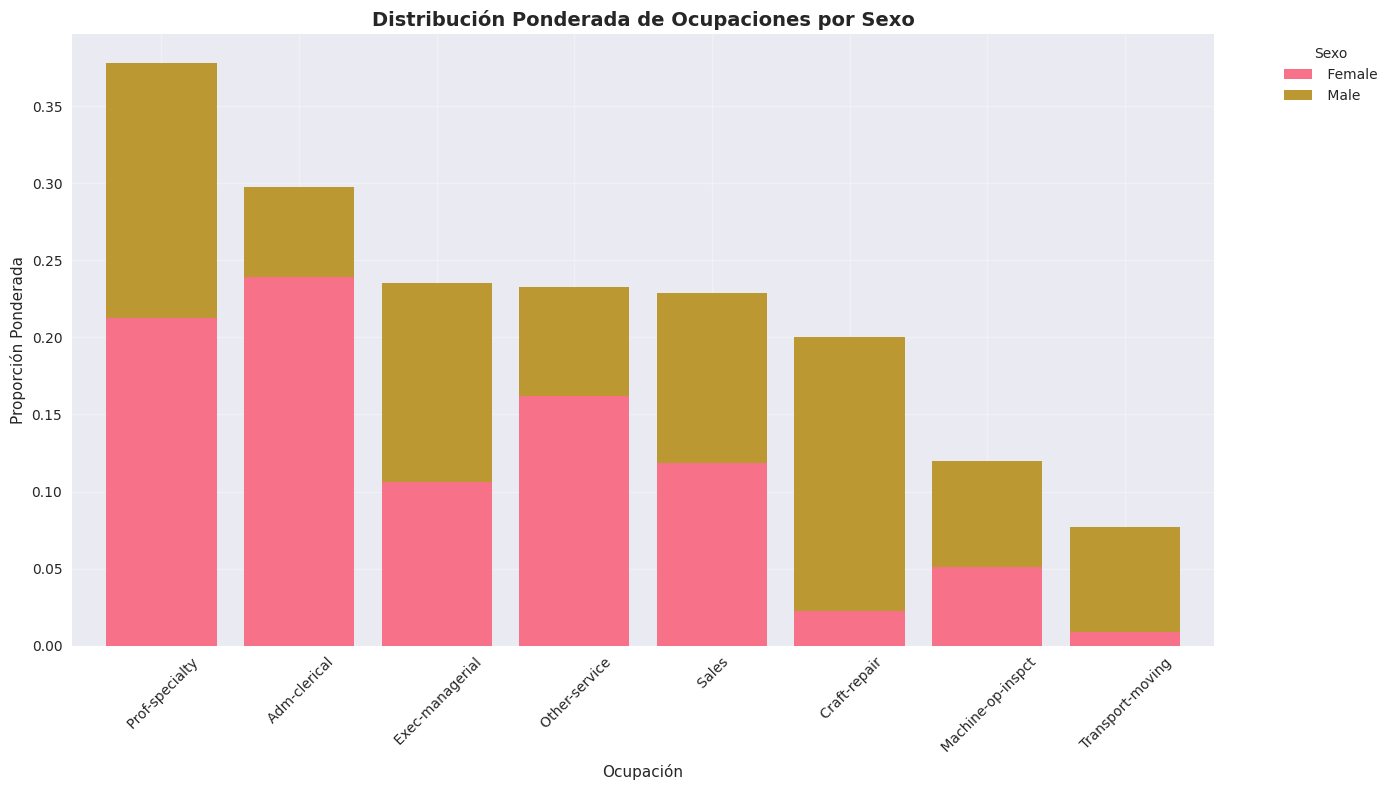

Columnas en sex_occupation_comparison: ['sex', 'occupation', 'proportion_unweighted', 'proportion_weighted', 'difference', 'difference_percent']


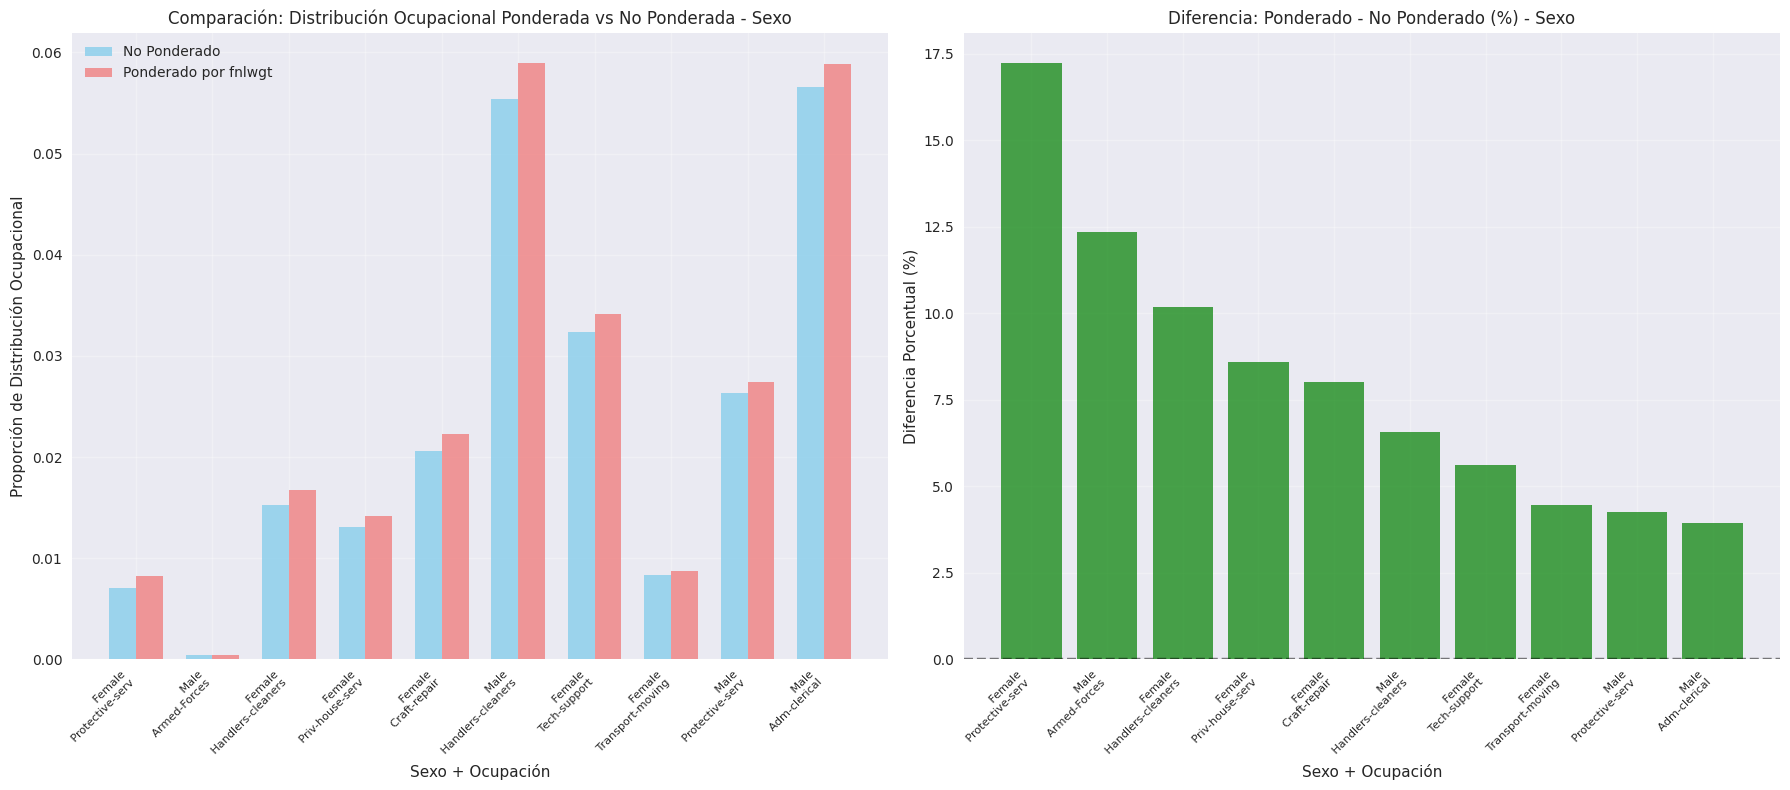


Análisis de concentración ocupacional:
----------------------------------------
Columnas disponibles: [' Female', ' Male']

Las 3 ocupaciones para  Female:
  1.  Adm-clerical: 0.239 (23.9%)
  2.  Prof-specialty: 0.213 (21.3%)
  3.  Other-service: 0.162 (16.2%)

Las 3 ocupaciones para  Male:
  1.  Craft-repair: 0.178 (17.8%)
  2.  Prof-specialty: 0.165 (16.5%)
  3.  Exec-managerial: 0.128 (12.8%)


2. DISTRIBUCIÓN DE OCUPACIONES POR RAZA
--------------------------------------------------
Comparación ponderada vs no ponderada - Distribución de ocupaciones por raza:
----------------------------------------------------------------------
                   race         occupation  proportion_unweighted  \
0    Amer-Indian-Eskimo       Adm-clerical                 0.0997   
1    Amer-Indian-Eskimo       Armed-Forces                 0.0032   
2    Amer-Indian-Eskimo       Craft-repair                 0.1415   
3    Amer-Indian-Eskimo    Exec-managerial                 0.0965   
4    Amer-Ind

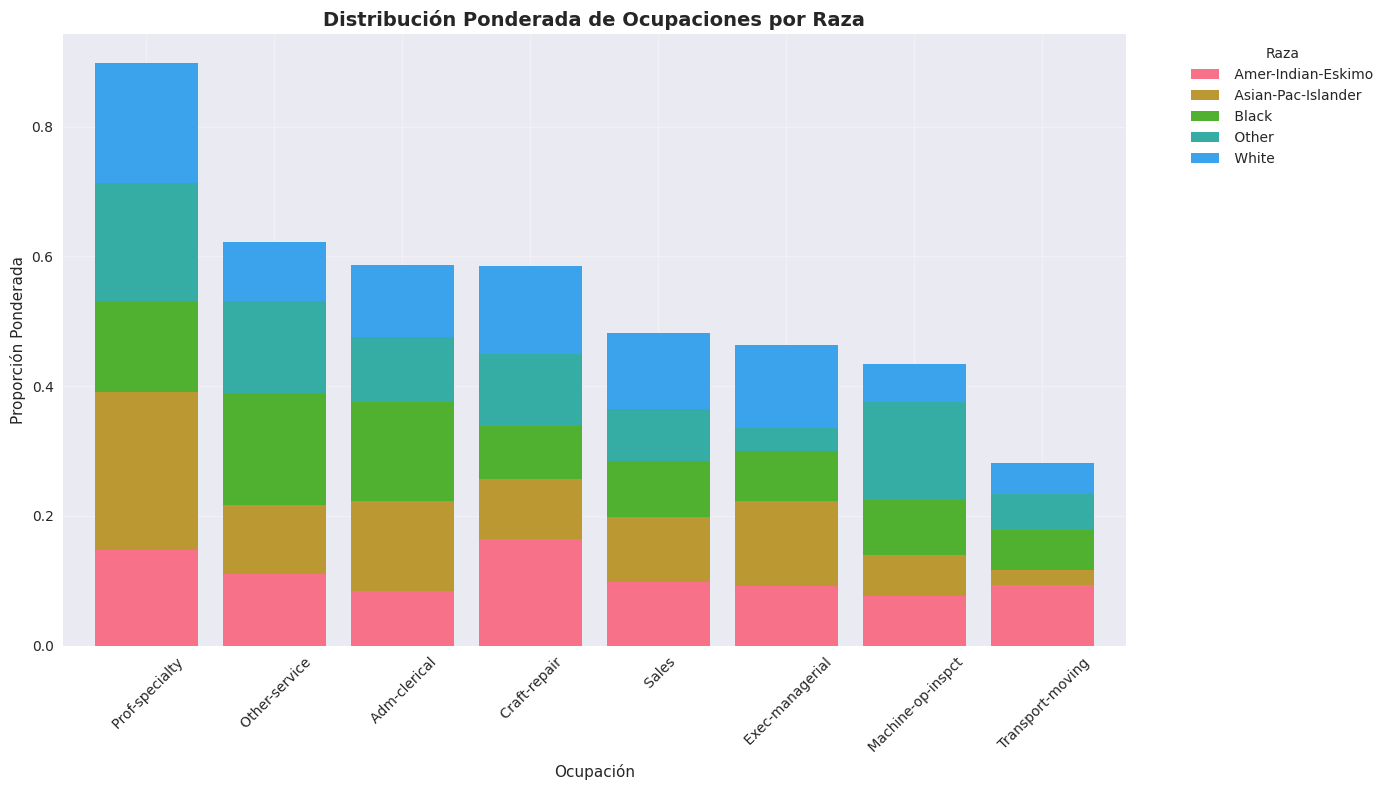

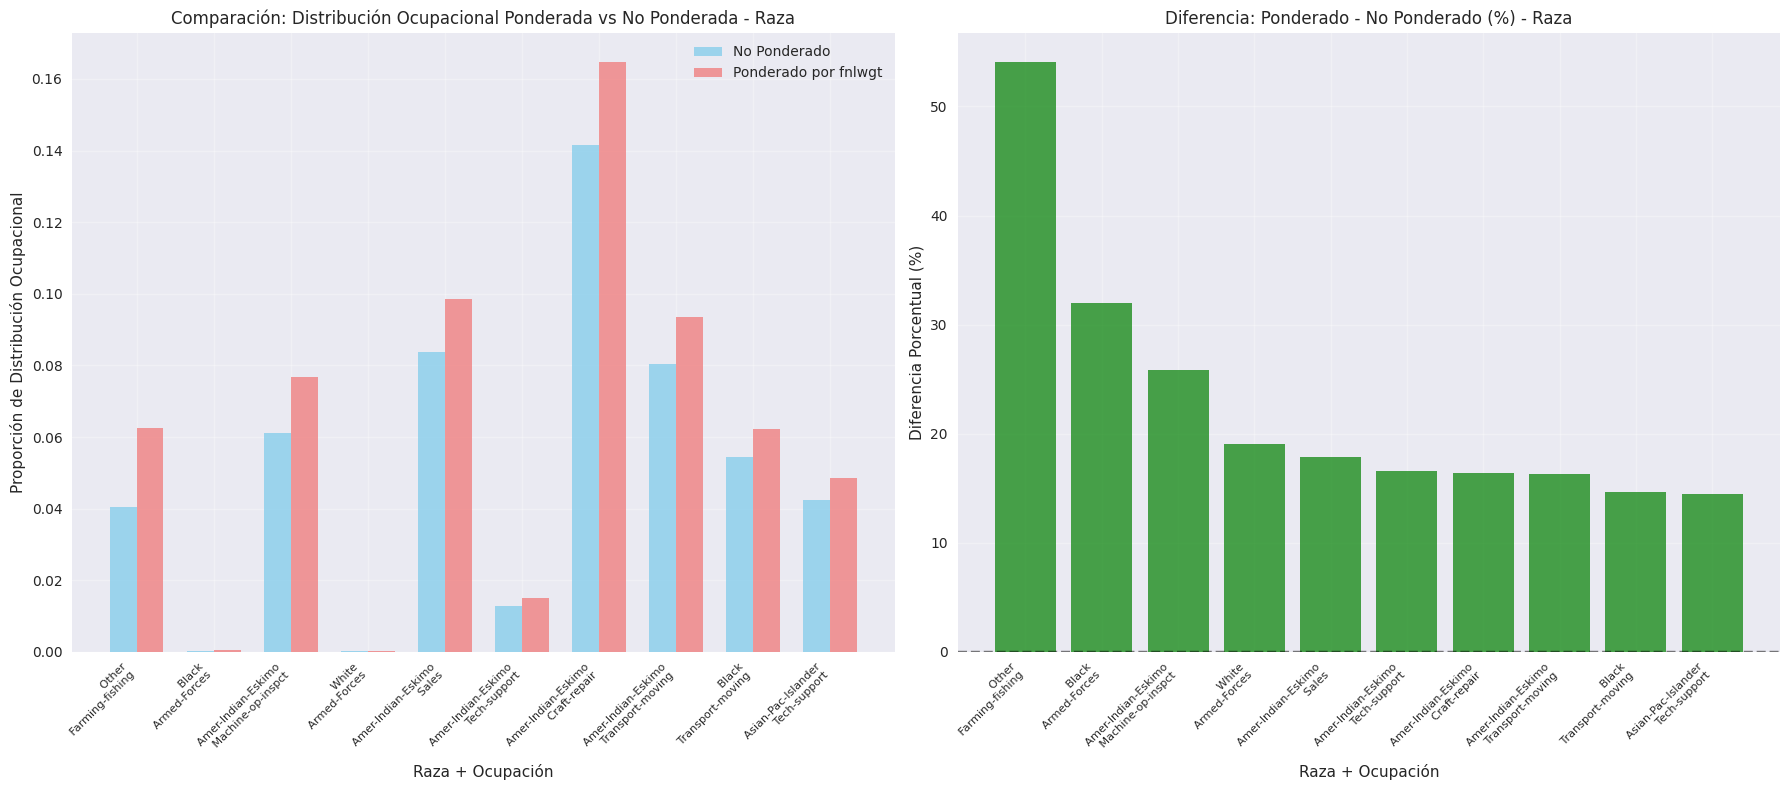


Análisis de concentración ocupacional:
----------------------------------------

Las3 ocupaciones para  Amer-Indian-Eskimo:
  1.  Craft-repair: 0.165 (16.5%)
  2.  Prof-specialty: 0.148 (14.8%)
  3.  Other-service: 0.111 (11.1%)

Las3 ocupaciones para  Asian-Pac-Islander:
  1.  Prof-specialty: 0.243 (24.3%)
  2.  Adm-clerical: 0.139 (13.9%)
  3.  Exec-managerial: 0.131 (13.1%)

Las3 ocupaciones para  Black:
  1.  Other-service: 0.171 (17.1%)
  2.  Adm-clerical: 0.153 (15.3%)
  3.  Prof-specialty: 0.140 (14.0%)

Las3 ocupaciones para  Other:
  1.  Prof-specialty: 0.183 (18.3%)
  2.  Machine-op-inspct: 0.151 (15.1%)
  3.  Other-service: 0.143 (14.3%)

Las3 ocupaciones para  White:
  1.  Prof-specialty: 0.184 (18.4%)
  2.  Craft-repair: 0.135 (13.5%)
  3.  Exec-managerial: 0.128 (12.8%)


3. DISTRIBUCIÓN DE OCUPACIONES POR EDUCACIÓN
--------------------------------------------------
Comparación ponderada vs no ponderada - Distribución de ocupaciones por educación:
-----------------------

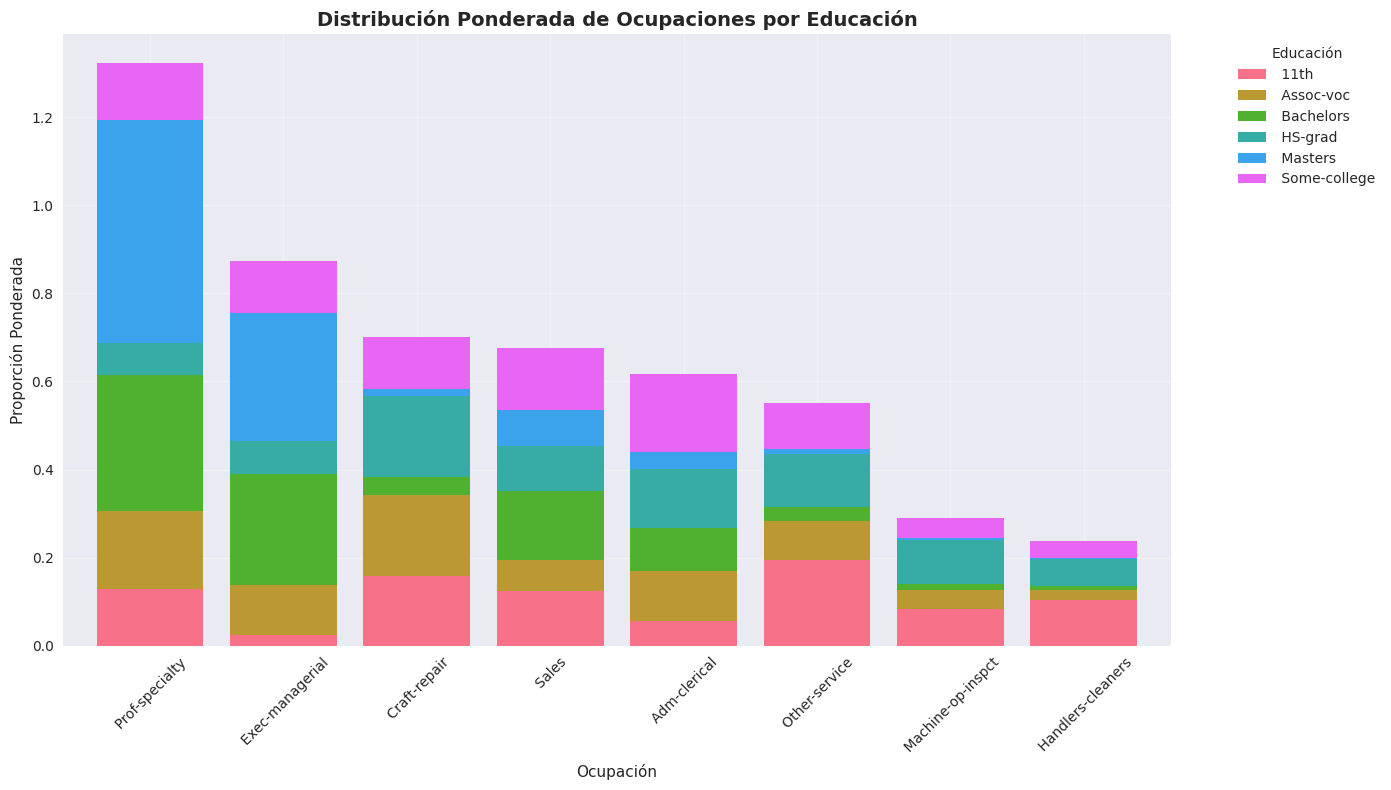

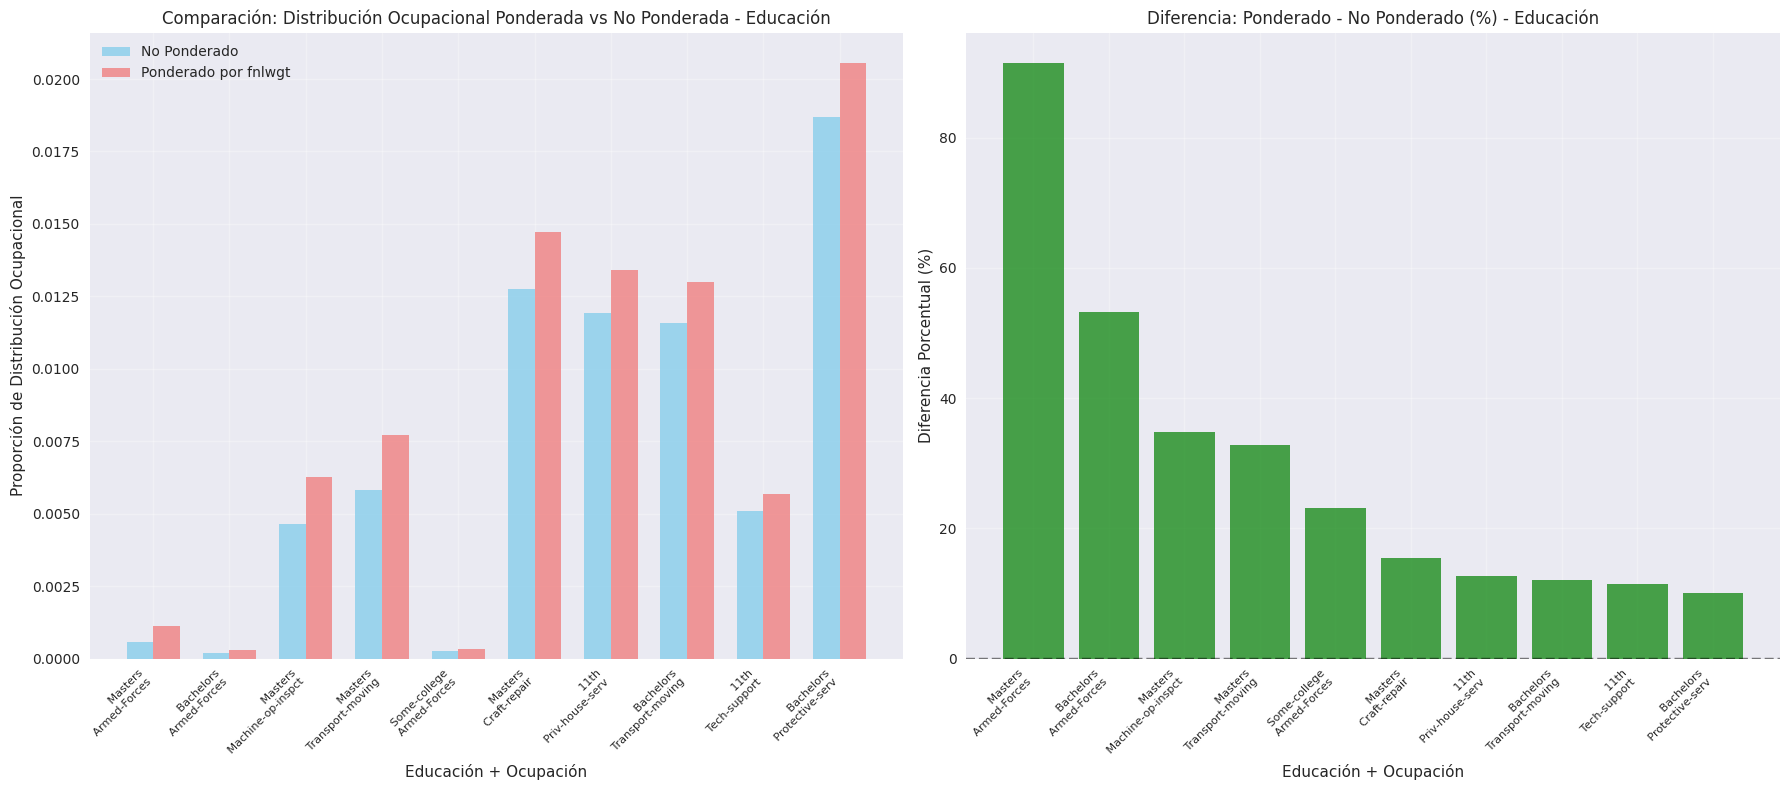



4. ANÁLISIS DE CONCENTRACIÓN OCUPACIONAL
MÉTODO: Utilizamos el Índice de Herfindahl-Hirschman (HHI) para medir la concentración ocupacional.
El HHI calcula la suma de los cuadrados de las proporciones de cada ocupación.
Valores altos indican concentración en pocas ocupaciones; valores bajos, mayor diversidad.

4.1. ÍNDICES DE CONCENTRACIÓN OCUPACIONAL
------------------------------------------------------------
Concentración por SEXO:
   Female   : HHI=0.159, Top3=0.614 (61.4%)
   Male     : HHI=0.112, Top3=0.471 (47.1%)

Concentración por RAZA:
   Amer-Indian-Eskimo : HHI=0.106, Top3=0.423 (42.3%)
   Asian-Pac-Islander : HHI=0.133, Top3=0.513 (51.3%)
   Black              : HHI=0.109, Top3=0.464 (46.4%)
   Other              : HHI=0.116, Top3=0.477 (47.7%)
   White              : HHI=0.113, Top3=0.447 (44.7%)

Interpretación del índice de concentración (HHI):
- HHI alto (>0.15): Alta concentración en pocas ocupaciones
- HHI medio (0.08-0.15): Concentración moderada
- HHI bajo (<0.08

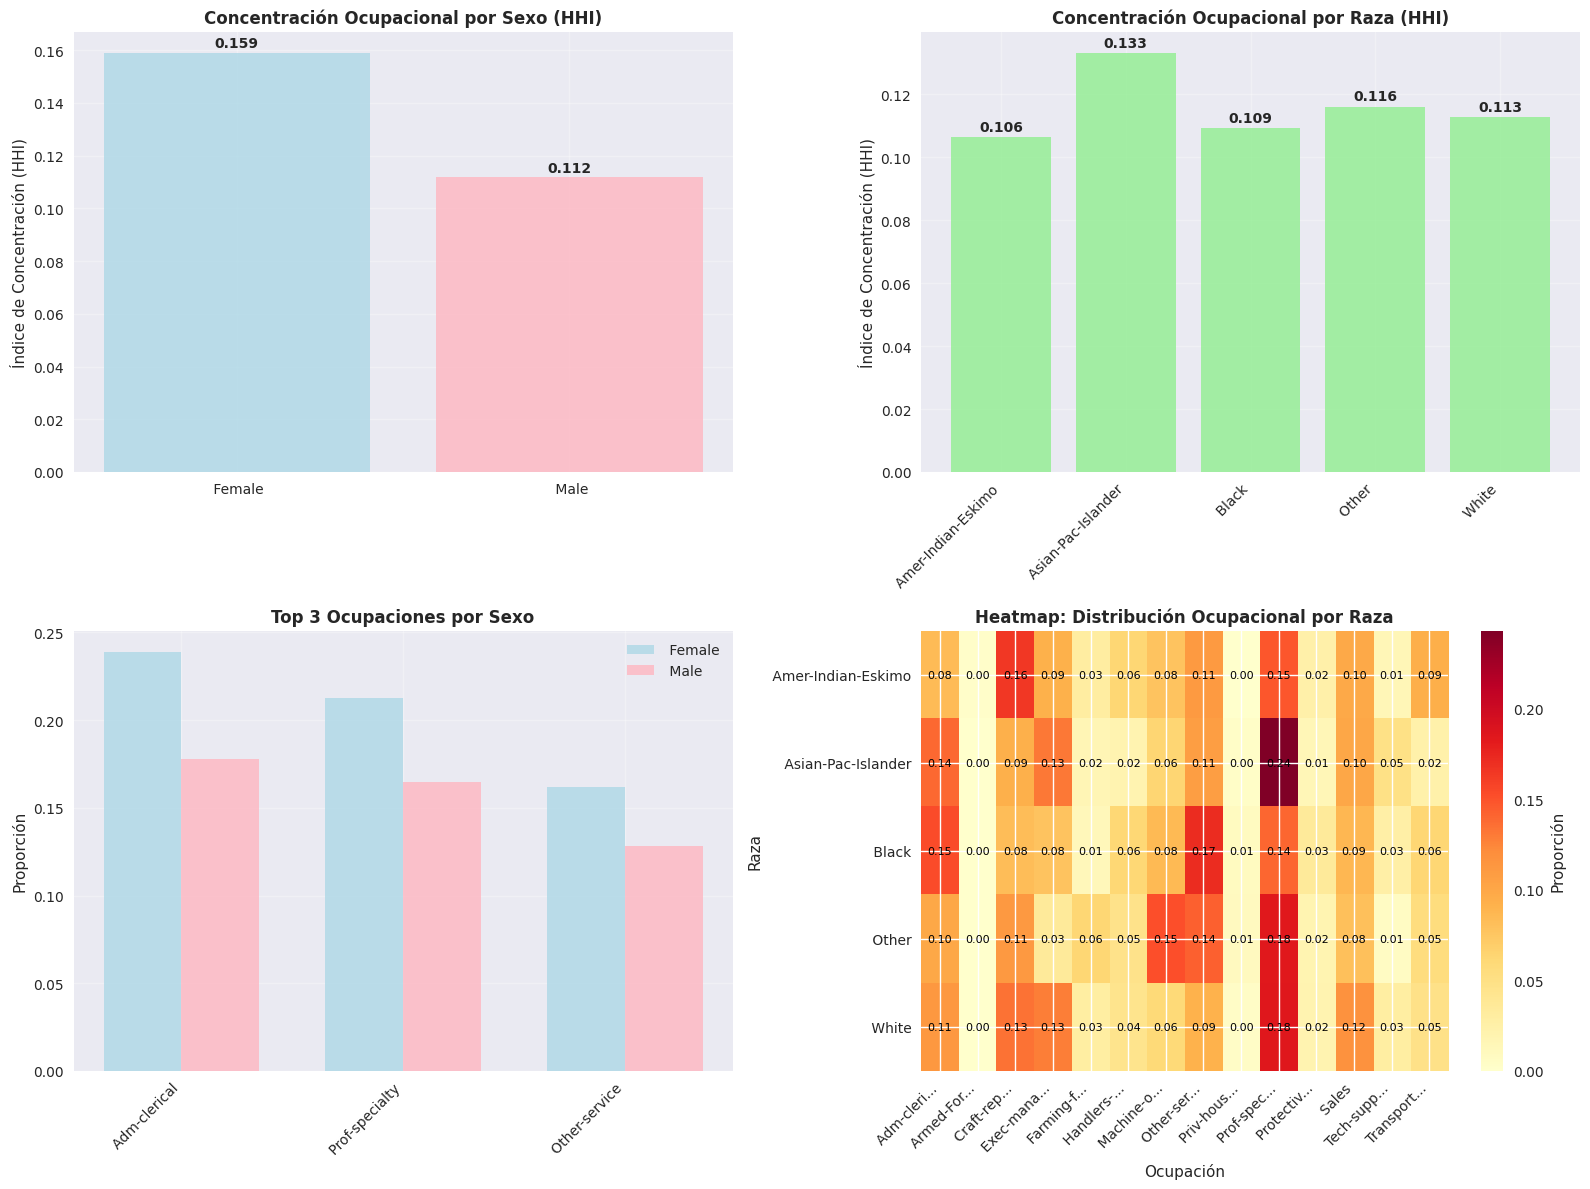

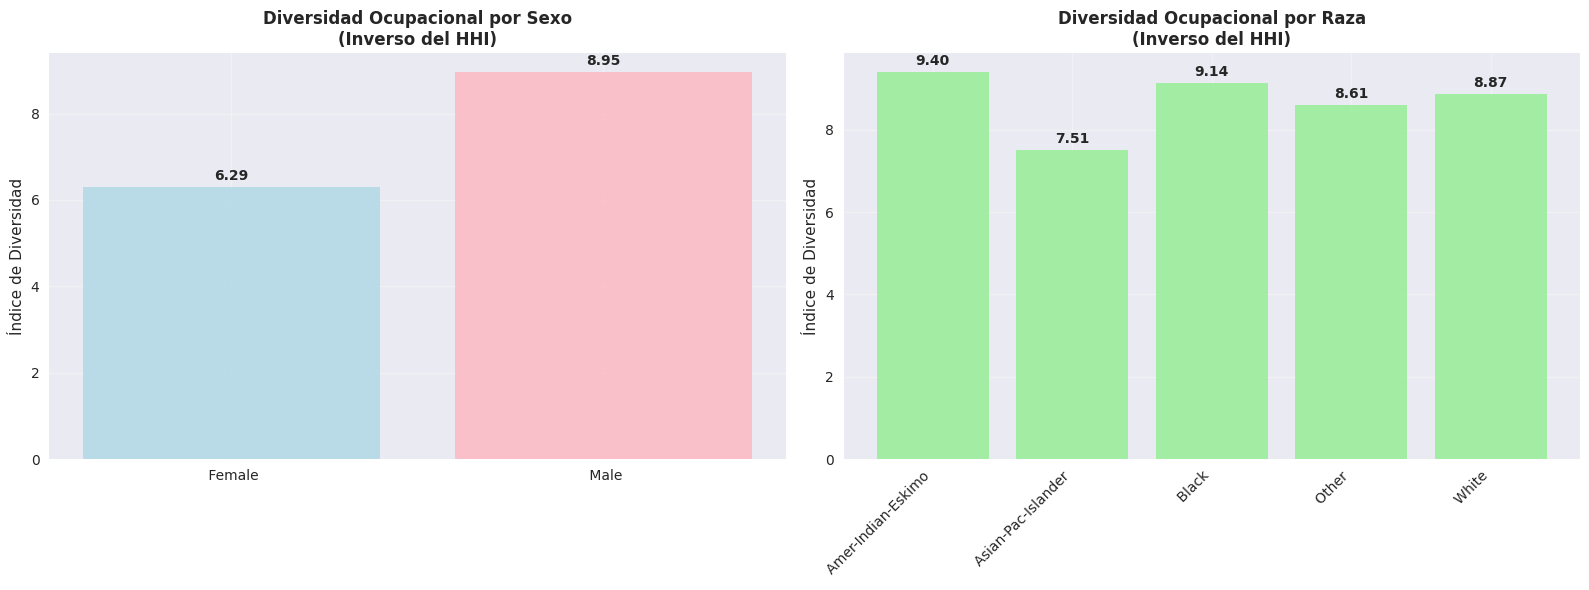

In [91]:
print("ANÁLISIS PONDERADO: DISTRIBUCIÓN DE OCUPACIONES POR VARIABLES DEMOGRÁFICAS")
print("="*80)

# Diagnóstico inicial de los datos
print("DIAGNÓSTICO INICIAL:")
print("-" * 30)
print(f"Dataset shape: {df_clean.shape}")
print(f"Columnas disponibles: {df_clean.columns.tolist()}")
print(f"Valores únicos en 'sex': {df_clean['sex'].unique()}")
print(f"Valores únicos en 'race': {df_clean['race'].unique()}")
print(f"Valores únicos en 'occupation': {df_clean['occupation'].nunique()} ocupaciones")
print(f"Primeras 5 ocupaciones: {df_clean['occupation'].value_counts().head().index.tolist()}")
print()

def analyze_occupation_distribution(df, group_var, weight_var='fnlwgt'):
    occupation_dist = df.groupby([group_var, 'occupation'])[weight_var].sum()
    group_totals = df.groupby(group_var)[weight_var].sum()
    
    weighted_proportions = (occupation_dist / group_totals).reset_index()
    weighted_proportions.columns = [group_var, 'occupation', 'proportion_weighted']
    
    pivot_table = weighted_proportions.pivot(index='occupation', columns=group_var, values='proportion_weighted').fillna(0)
    
    return pivot_table

def compare_occupation_weighted_unweighted(df, group_var, weight_var='fnlwgt'):
    unweighted_dist = df.groupby([group_var, 'occupation']).size()
    unweighted_totals = df.groupby(group_var).size()
    unweighted_proportions = (unweighted_dist / unweighted_totals).reset_index()
    unweighted_proportions.columns = [group_var, 'occupation', 'proportion_unweighted']
    
    weighted_proportions = analyze_occupation_distribution(df, group_var, weight_var)
    weighted_proportions_long = weighted_proportions.reset_index().melt(
        id_vars='occupation', 
        var_name=group_var, 
        value_name='proportion_weighted'
    )
    
    comparison = pd.merge(
        unweighted_proportions, 
        weighted_proportions_long, 
        on=[group_var, 'occupation']
    )
    
    comparison['difference'] = comparison['proportion_weighted'] - comparison['proportion_unweighted']
    comparison['difference_percent'] = (comparison['difference'] / comparison['proportion_unweighted']) * 100
    
    return comparison, weighted_proportions

def plot_occupation_distribution(pivot_table, group_var, top_n=8):
    top_occupations = pivot_table.sum(axis=1).nlargest(top_n).index
    plot_data = pivot_table.loc[top_occupations]
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    plot_data.plot(kind='bar', stacked=True, ax=ax, width=0.8)
    
    ax.set_title(f'Distribución Ponderada de Ocupaciones por {group_var}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Ocupación')
    ax.set_ylabel('Proporción Ponderada')
    ax.legend(title=group_var, bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return plot_data

def plot_occupation_comparison(comparison_df, group_var, top_n=10):
    actual_group_col = None
    for col in comparison_df.columns:
        if col not in ['occupation', 'proportion_unweighted', 'proportion_weighted', 'difference', 'difference_percent']:
            actual_group_col = col
            break
    
    if actual_group_col is None:
        print("Error: No se pudo identificar la columna de grupo en el DataFrame")
        return
    
    top_occupations = comparison_df.nlargest(top_n, 'difference_percent')
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))
    
    occupations = top_occupations['occupation'].tolist()
    groups = top_occupations[actual_group_col].tolist()
    
    labels = [f"{group}\n{occ}" for group, occ in zip(groups, occupations)]
    
    x_pos = range(len(labels))
    width = 0.35
    
    ax1.bar([x - width/2 for x in x_pos], top_occupations['proportion_unweighted'], 
            width, label='No Ponderado', alpha=0.8, color='skyblue')
    ax1.bar([x + width/2 for x in x_pos], top_occupations['proportion_weighted'], 
            width, label='Ponderado por fnlwgt', alpha=0.8, color='lightcoral')
    
    ax1.set_xlabel(f'{group_var} + Ocupación')
    ax1.set_ylabel('Proporción de Distribución Ocupacional')
    ax1.set_title(f'Comparación: Distribución Ocupacional Ponderada vs No Ponderada - {group_var}')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    colors = ['red' if x < 0 else 'green' for x in top_occupations['difference_percent']]
    ax2.bar(range(len(top_occupations)), top_occupations['difference_percent'], 
            color=colors, alpha=0.7)
    ax2.set_xlabel(f'{group_var} + Ocupación')
    ax2.set_ylabel('Diferencia Porcentual (%)')
    ax2.set_title(f'Diferencia: Ponderado - No Ponderado (%) - {group_var}')
    ax2.set_xticks(range(len(top_occupations)))
    ax2.set_xticklabels(labels, rotation=45, ha='right', fontsize=8)
    ax2.axhline(y=0, color='black', linestyle='--', alpha=0.5)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

print("\n1. DISTRIBUCIÓN DE OCUPACIONES POR SEXO")
print("-" * 50)

sex_occupation_comparison, sex_occupation_dist = compare_occupation_weighted_unweighted(df_clean, 'sex')

print("Comparación ponderada vs no ponderada - Distribución de ocupaciones por sexo:")
print("-" * 70)
print(sex_occupation_comparison.round(4))

print("\nInterpretación de diferencias:")
print("-" * 30)
top_differences = sex_occupation_comparison.nlargest(5, 'difference_percent')
print("Las 5 ocupaciones con mayor diferencia porcentual:")
for _, row in top_differences.iterrows():
    group = row['sex']
    occupation = row['occupation']
    diff_pct = row['difference_percent']
    if diff_pct > 0:
        print(f"• {group} + {occupation}: +{diff_pct:.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {group} + {occupation}: {diff_pct:.2f}% (sub-representado en muestra)")

sex_plot_data = plot_occupation_distribution(sex_occupation_dist, 'Sexo')
print("Columnas en sex_occupation_comparison:", sex_occupation_comparison.columns.tolist())
plot_occupation_comparison(sex_occupation_comparison, 'Sexo')

print("\nAnálisis de concentración ocupacional:")
print("-" * 40)

print("Columnas disponibles:", sex_occupation_dist.columns.tolist())
for sex in sex_occupation_dist.columns:
    top_occupations = sex_occupation_dist[sex].nlargest(3)
    print(f"\nLas 3 ocupaciones para {sex}:")
    for i, (occupation, proportion) in enumerate(top_occupations.items(), 1):
        print(f"  {i}. {occupation}: {proportion:.3f} ({proportion*100:.1f}%)")

print("\n\n2. DISTRIBUCIÓN DE OCUPACIONES POR RAZA")
print("-" * 50)

race_occupation_comparison, race_occupation_dist = compare_occupation_weighted_unweighted(df_clean, 'race')

print("Comparación ponderada vs no ponderada - Distribución de ocupaciones por raza:")
print("-" * 70)
print(race_occupation_comparison.round(4))

print("\nInterpretación de diferencias:")
print("-" * 30)
top_differences_race = race_occupation_comparison.nlargest(5, 'difference_percent')
print("Las 5 ocupaciones con mayor diferencia porcentual:")
for _, row in top_differences_race.iterrows():
    group = row['race']
    occupation = row['occupation']
    diff_pct = row['difference_percent']
    if diff_pct > 0:
        print(f"• {group} + {occupation}: +{diff_pct:.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {group} + {occupation}: {diff_pct:.2f}% (sub-representado en muestra)")

race_plot_data = plot_occupation_distribution(race_occupation_dist, 'Raza')
plot_occupation_comparison(race_occupation_comparison, 'Raza')

print("\nAnálisis de concentración ocupacional:")
print("-" * 40)

for race in race_occupation_dist.columns:
    top_occupations = race_occupation_dist[race].nlargest(3)
    print(f"\nLas3 ocupaciones para {race}:")
    for i, (occupation, proportion) in enumerate(top_occupations.items(), 1):
        print(f"  {i}. {occupation}: {proportion:.3f} ({proportion*100:.1f}%)")

print("\n\n3. DISTRIBUCIÓN DE OCUPACIONES POR EDUCACIÓN")
print("-" * 50)

top_education_levels = df_clean['education'].value_counts().head(6).index
education_subset = df_clean[df_clean['education'].isin(top_education_levels)]

education_occupation_comparison, education_occupation_dist = compare_occupation_weighted_unweighted(education_subset, 'education')

print("Comparación ponderada vs no ponderada - Distribución de ocupaciones por educación:")
print("-" * 70)
print(education_occupation_comparison.round(4))

print("\nInterpretación de diferencias:")
print("-" * 30)
top_differences_education = education_occupation_comparison.nlargest(5, 'difference_percent')
print("Las 5 ocupaciones con mayor diferencia porcentual:")
for _, row in top_differences_education.iterrows():
    group = row['education']
    occupation = row['occupation']
    diff_pct = row['difference_percent']
    if diff_pct > 0:
        print(f"• {group} + {occupation}: +{diff_pct:.2f}% (sobre-representado en muestra)")
    else:
        print(f"• {group} + {occupation}: {diff_pct:.2f}% (sub-representado en muestra)")

education_plot_data = plot_occupation_distribution(education_occupation_dist, 'Educación')
plot_occupation_comparison(education_occupation_comparison, 'Educación')

print("\n\n4. ANÁLISIS DE CONCENTRACIÓN OCUPACIONAL")
print("="*80)

print("MÉTODO: Utilizamos el Índice de Herfindahl-Hirschman (HHI) para medir la concentración ocupacional.")
print("El HHI calcula la suma de los cuadrados de las proporciones de cada ocupación.")
print("Valores altos indican concentración en pocas ocupaciones; valores bajos, mayor diversidad.")
print()

def calculate_concentration_index(proportions):
    """Calcula el índice de Herfindahl-Hirschman para medir concentración"""
    return (proportions ** 2).sum()

def calculate_top3_concentration(proportions):
    """Calcula qué porcentaje representan las top 3 ocupaciones"""
    return proportions.nlargest(3).sum()

def analyze_occupation_dominance(proportions, group_name):
    """Analiza qué ocupaciones dominan cada grupo"""
    top_3 = proportions.nlargest(3)
    dominance_analysis = {
        'group': group_name,
        'top_occupation': top_3.index[0],
        'top_proportion': top_3.iloc[0],
        'top3_total': top_3.sum(),
        'concentration_index': calculate_concentration_index(proportions),
        'top3_concentration': calculate_top3_concentration(proportions)
    }
    return dominance_analysis

print("4.1. ÍNDICES DE CONCENTRACIÓN OCUPACIONAL")
print("-" * 60)

# Análisis por sexo
sex_concentrations = {}
print("Concentración por SEXO:")
for sex in sex_occupation_dist.columns:
    concentration = calculate_concentration_index(sex_occupation_dist[sex])
    top3_conc = calculate_top3_concentration(sex_occupation_dist[sex])
    sex_concentrations[sex] = concentration
    print(f"  {sex:10s}: HHI={concentration:.3f}, Top3={top3_conc:.3f} ({top3_conc*100:.1f}%)")

print("\nConcentración por RAZA:")
race_concentrations = {}
for race in race_occupation_dist.columns:
    concentration = calculate_concentration_index(race_occupation_dist[race])
    top3_conc = calculate_top3_concentration(race_occupation_dist[race])
    race_concentrations[race] = concentration
    print(f"  {race:20s}: HHI={concentration:.3f}, Top3={top3_conc:.3f} ({top3_conc*100:.1f}%)")

print("\nInterpretación del índice de concentración (HHI):")
print("- HHI alto (>0.15): Alta concentración en pocas ocupaciones")
print("- HHI medio (0.08-0.15): Concentración moderada")
print("- HHI bajo (<0.08): Distribución más diversa en ocupaciones")

print("\n4.2. EJEMPLOS ESPECÍFICOS DE OCUPACIONES DOMINANTES")
print("-" * 60)

print("DOMINANCIA OCUPACIONAL POR SEXO:")
print("-" * 40)
for sex in sex_occupation_dist.columns:
    top_occupations = sex_occupation_dist[sex].nlargest(3)
    print(f"\n{sex.upper()}:")
    for i, (occupation, proportion) in enumerate(top_occupations.items(), 1):
        print(f"  {i}. {occupation}: {proportion:.3f} ({proportion*100:.1f}%)")
    
    # Análisis de dominancia
    dominance = analyze_occupation_dominance(sex_occupation_dist[sex], sex)
    print(f"  → Ocupación dominante: {dominance['top_occupation']} ({dominance['top_proportion']*100:.1f}%)")
    print(f"  → Top 3 concentran: {dominance['top3_concentration']*100:.1f}% del empleo")

print("\nDOMINANCIA OCUPACIONAL POR RAZA:")
print("-" * 40)
for race in race_occupation_dist.columns:
    top_occupations = race_occupation_dist[race].nlargest(3)
    print(f"\n{race.upper()}:")
    for i, (occupation, proportion) in enumerate(top_occupations.items(), 1):
        print(f"  {i}. {occupation}: {proportion:.3f} ({proportion*100:.1f}%)")
    
    # Análisis de dominancia
    dominance = analyze_occupation_dominance(race_occupation_dist[race], race)
    print(f"  → Ocupación dominante: {dominance['top_occupation']} ({dominance['top_proportion']*100:.1f}%)")
    print(f"  → Top 3 concentran: {dominance['top3_concentration']*100:.1f}% del empleo")

print("\n4.3. COMPARACIONES DIRECTAS ENTRE GRUPOS")
print("-" * 60)

print("COMPARACIÓN DE CONCENTRACIÓN ENTRE SEXOS:")
print("-" * 45)

# Diagnosticar los nombres de las columnas
print("Nombres de columnas en sex_occupation_dist:", sex_occupation_dist.columns.tolist())
print("Claves en sex_concentrations:", list(sex_concentrations.keys()))

# Usar los nombres reales de las columnas
sex_columns = list(sex_concentrations.keys())
if len(sex_columns) >= 2:
    sex1, sex2 = sex_columns[0], sex_columns[1]
    sex1_conc = sex_concentrations[sex1]
    sex2_conc = sex_concentrations[sex2]
    print(f"Concentración HHI - {sex1}: {sex1_conc:.3f}, {sex2}: {sex2_conc:.3f}")
    print(f"Diferencia: {abs(sex1_conc - sex2_conc):.3f} ({sex1 if sex1_conc > sex2_conc else sex2} más concentrados)")

    # Comparar ocupaciones dominantes
    sex1_dominant = sex_occupation_dist[sex1].idxmax()
    sex2_dominant = sex_occupation_dist[sex2].idxmax()
    print(f"Ocupación dominante - {sex1}: {sex1_dominant}, {sex2}: {sex2_dominant}")
    print(f"¿Misma ocupación dominante? {'Sí' if sex1_dominant == sex2_dominant else 'No'}")
else:
    print("Error: No hay suficientes grupos de sexo para comparar")

print("\nCOMPARACIÓN DE CONCENTRACIÓN ENTRE RAZAS:")
print("-" * 45)
race_conc_sorted = sorted(race_concentrations.items(), key=lambda x: x[1], reverse=True)
print("Razas ordenadas por concentración (mayor a menor):")
for i, (race, conc) in enumerate(race_conc_sorted, 1):
    print(f"  {i}. {race}: {conc:.3f}")

# Análisis de diversidad ocupacional
most_diverse = min(race_concentrations.items(), key=lambda x: x[1])
least_diverse = max(race_concentrations.items(), key=lambda x: x[1])
print(f"\nRaza más diversa ocupacionalmente: {most_diverse[0]} (HHI: {most_diverse[1]:.3f})")
print(f"Raza menos diversa ocupacionalmente: {least_diverse[0]} (HHI: {least_diverse[1]:.3f})")

print("\n4.4. GRÁFICOS ADICIONALES DE CONCENTRACIÓN")
print("-" * 60)

# Gráfico 1: Comparación de concentración por grupos
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))

# Concentración por sexo
sexes = list(sex_concentrations.keys())
sex_conc_values = list(sex_concentrations.values())
bars1 = ax1.bar(sexes, sex_conc_values, color=['lightblue', 'lightpink'], alpha=0.8)
ax1.set_title('Concentración Ocupacional por Sexo (HHI)', fontweight='bold')
ax1.set_ylabel('Índice de Concentración (HHI)')
ax1.grid(True, alpha=0.3)
for i, v in enumerate(sex_conc_values):
    ax1.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Concentración por raza
races = list(race_concentrations.keys())
race_conc_values = list(race_concentrations.values())
bars2 = ax2.bar(range(len(races)), race_conc_values, color='lightgreen', alpha=0.8)
ax2.set_title('Concentración Ocupacional por Raza (HHI)', fontweight='bold')
ax2.set_ylabel('Índice de Concentración (HHI)')
ax2.set_xticks(range(len(races)))
ax2.set_xticklabels(races, rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
for i, v in enumerate(race_conc_values):
    ax2.text(i, v + 0.001, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Top 3 ocupaciones por sexo
if len(sex_occupation_dist.columns) >= 2:
    sex1_col, sex2_col = sex_occupation_dist.columns[0], sex_occupation_dist.columns[1]
    sex1_top3 = sex_occupation_dist[sex1_col].nlargest(3)
    sex2_top3 = sex_occupation_dist[sex2_col].nlargest(3)

    x = np.arange(len(sex1_top3))
    width = 0.35

    ax3.bar(x - width/2, sex1_top3.values, width, label=sex1_col, alpha=0.8, color='lightblue')
    ax3.bar(x + width/2, sex2_top3.values, width, label=sex2_col, alpha=0.8, color='lightpink')
    ax3.set_title('Top 3 Ocupaciones por Sexo', fontweight='bold')
    ax3.set_ylabel('Proporción')
    ax3.set_xticks(x)
    ax3.set_xticklabels([occ[:15] + '...' if len(occ) > 15 else occ for occ in sex1_top3.index], rotation=45, ha='right')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
else:
    ax3.text(0.5, 0.5, 'No hay suficientes grupos de sexo', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Top 3 Ocupaciones por Sexo', fontweight='bold')

# Heatmap de concentración ocupacional por raza
race_occupation_heatmap = race_occupation_dist.T
im = ax4.imshow(race_occupation_heatmap.values, cmap='YlOrRd', aspect='auto')
ax4.set_title('Heatmap: Distribución Ocupacional por Raza', fontweight='bold')
ax4.set_xlabel('Ocupación')
ax4.set_ylabel('Raza')
ax4.set_xticks(range(len(race_occupation_heatmap.columns)))
ax4.set_xticklabels([occ[:10] + '...' if len(occ) > 10 else occ for occ in race_occupation_heatmap.columns], rotation=45, ha='right')
ax4.set_yticks(range(len(race_occupation_heatmap.index)))
ax4.set_yticklabels(race_occupation_heatmap.index)

# Añadir valores al heatmap
for i in range(len(race_occupation_heatmap.index)):
    for j in range(len(race_occupation_heatmap.columns)):
        text = ax4.text(j, i, f'{race_occupation_heatmap.iloc[i, j]:.2f}',
                       ha="center", va="center", color="black", fontsize=8)

plt.colorbar(im, ax=ax4, label='Proporción')
plt.tight_layout()
plt.show()

# Gráfico 2: Análisis de diversidad ocupacional
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Diversidad por sexo (inverso de concentración)
sex_diversity = {sex: 1/conc for sex, conc in sex_concentrations.items()}
ax1.bar(sex_diversity.keys(), sex_diversity.values(), color=['lightblue', 'lightpink'], alpha=0.8)
ax1.set_title('Diversidad Ocupacional por Sexo\n(Inverso del HHI)', fontweight='bold')
ax1.set_ylabel('Índice de Diversidad')
ax1.grid(True, alpha=0.3)
for sex, div in sex_diversity.items():
    ax1.text(sex, div + 0.1, f'{div:.2f}', ha='center', va='bottom', fontweight='bold')

# Diversidad por raza
race_diversity = {race: 1/conc for race, conc in race_concentrations.items()}
bars = ax2.bar(range(len(race_diversity)), race_diversity.values(), color='lightgreen', alpha=0.8)
ax2.set_title('Diversidad Ocupacional por Raza\n(Inverso del HHI)', fontweight='bold')
ax2.set_ylabel('Índice de Diversidad')
ax2.set_xticks(range(len(race_diversity)))
ax2.set_xticklabels(race_diversity.keys(), rotation=45, ha='right')
ax2.grid(True, alpha=0.3)
for i, div in enumerate(race_diversity.values()):
    ax2.text(i, div + 0.1, f'{div:.2f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()